## Reading the original File of Data

In [1]:
import pandas as pd

original = pd.read_csv('UCEC_RNA_Seq.csv', index_col='Transcript')

In [2]:
original.shape

(60483, 587)

In [3]:
filteredDf= original.iloc[:,] >= 10
original['records_doesnot_exceed_10'] = filteredDf.sum(axis=1)
cols_num = original.shape[1]

updatedDf = original[original['records_doesnot_exceed_10'] >= cols_num/4]

filetered_data = updatedDf.drop('records_doesnot_exceed_10', axis=1)
filetered_data.shape

(5475, 587)

## Rename columns with samples ids

In [4]:
import json

with open('metadata.cart.2020-12-23.json') as file:
    meta = json.load(file)

In [5]:
sub_id = []
file_name = []
for i, dic in enumerate(meta):
    sub_id.append(str(meta[i]['associated_entities'][0]['entity_submitter_id'])[0:16])
    file_name.append(meta[i]['submitter_id'][:-5])
    
cols_dic = dict(zip(file_name, sub_id))

In [6]:
UCEC = filetered_data.rename(columns=cols_dic)

In [7]:
UCEC

,TCGA-D1-A17L-01A,TCGA-A5-A0GI-01A,TCGA-D1-A160-01A,TCGA-D1-A16X-01A,TCGA-AX-A1C8-01A,TCGA-BK-A13C-01A,TCGA-D1-A175-01A,TCGA-AX-A06J-01A,TCGA-BS-A0UT-01A,TCGA-AX-A1C5-01A,...,TCGA-A5-A1OH-01A,TCGA-EY-A1GC-01A,TCGA-D1-A1O5-01A,TCGA-BK-A4ZD-11A,TCGA-AP-A05J-01A,TCGA-DF-A2KU-01A,TCGA-AX-A3G8-01A,TCGA-AJ-A3EL-01A,TCGA-AP-A1DM-01A,TCGA-BG-A220-01A
Transcript,,,,,,,,,,,,,,,,,,,,,
ENSG00000146083.10,13.011391,11.427045,10.787671,16.083836,11.842547,9.902156,11.470896,17.094628,13.262287,13.541330,...,9.003191,6.764077,12.795741,8.225546,9.620348,4.114064,2.688903,7.010887,16.573846,22.948267
ENSG00000198242.12,137.456077,293.805262,174.082556,193.279954,94.698071,151.531153,184.117366,255.666425,122.838004,245.755510,...,217.825438,155.020175,165.234450,126.357777,224.319879,235.216379,547.672135,197.256088,169.015276,156.694658
ENSG00000134108.11,16.458143,12.741908,18.379668,10.560327,17.770202,29.477545,15.008244,9.199840,13.205734,18.851129,...,22.464290,42.170139,22.702420,30.533872,6.338493,15.828921,19.811603,13.610094,16.869509,25.560686
ENSG00000167700.7,14.473938,24.901977,27.118570,44.546959,33.372229,21.914281,17.668392,29.588563,12.823318,46.255754,...,21.570506,20.957440,18.702100,3.088624,18.792150,28.325632,49.205548,18.468799,22.009018,23.979946
ENSG00000070087.12,11.524599,27.999849,27.288790,28.698825,31.571146,33.536484,47.846396,60.828217,10.381238,49.661967,...,94.306692,31.521402,32.076335,40.104276,11.600653,23.180255,17.962744,80.321153,20.302258,80.011071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000099991.15,18.630183,14.273012,14.402849,27.648228,11.971483,16.376858,17.984327,29.274684,18.644347,19.859028,...,7.637279,6.589883,15.323897,9.403329,14.793158,10.819996,7.908150,10.823759,17.108140,16.702291
ENSG00000102265.10,135.163794,307.567192,334.720191,182.630607,276.215469,82.458114,52.772302,28.092107,1585.070243,86.173760,...,110.825452,611.199593,1057.281165,107.652604,65.806864,368.778993,928.751388,241.652880,481.822078,108.519328
ENSG00000133313.13,30.779709,26.219112,22.659957,60.480337,27.844254,23.084527,51.379765,31.351872,12.502707,27.286406,...,8.950659,9.128646,28.470640,10.930361,8.147827,19.501944,9.290533,23.800013,20.052048,16.784600


### drop non-solid tumur samples

In [8]:
for column in UCEC:
    if(column.endswith('11A')):
        print(column)
        UCEC = UCEC.drop(columns=[column], axis=1)

TCGA-FL-A1YL-11A
TCGA-AX-A2HD-11A
TCGA-AJ-A3NH-11A
TCGA-AJ-A3NE-11A
TCGA-AX-A0J0-11A
TCGA-AX-A1CI-11A
TCGA-FL-A3WE-11A
TCGA-BG-A3PP-11A
TCGA-AX-A1CF-11A
TCGA-AX-A05Y-11A
TCGA-FL-A1YQ-11A
TCGA-DI-A2QY-11A
TCGA-BG-A2AD-11A
TCGA-E6-A1M0-11A
TCGA-FL-A1YF-11A
TCGA-FL-A1YH-11A
TCGA-FL-A1YT-11A
TCGA-BK-A0CB-11A
TCGA-AX-A1CK-11A
TCGA-AJ-A2QL-11A
TCGA-BK-A13C-11A
TCGA-FL-A1YU-11A
TCGA-FL-A1YM-11A
TCGA-BG-A3EW-11A
TCGA-FL-A1YI-11A
TCGA-AX-A2H8-11A
TCGA-FL-A1YV-11A
TCGA-AX-A2HC-11A
TCGA-FL-A1YG-11A
TCGA-AJ-A3NC-11A
TCGA-DI-A2QU-11A
TCGA-AX-A2HA-11A
TCGA-AX-A0IZ-11A
TCGA-FL-A1YN-11A
TCGA-BK-A4ZD-11A


### Take the mean of duplicate samples

In [9]:
from collections import Counter
columns_list = list(UCEC.columns)
columns_counts = Counter(columns_list)

In [10]:
have_doup_cols = dict((k, v) for k, v in columns_counts.items() if v > 1)

In [11]:
for i in have_doup_cols.keys():
    UCEC[i] = UCEC[i].mean(axis=1)

In [12]:
UCEC.shape

(5475, 552)

In [13]:
UCEC = UCEC.loc[:,~UCEC.columns.duplicated()]

In [14]:
UCEC.shape

(5475, 548)

In [15]:
UCEC

,TCGA-D1-A17L-01A,TCGA-A5-A0GI-01A,TCGA-D1-A160-01A,TCGA-D1-A16X-01A,TCGA-AX-A1C8-01A,TCGA-BK-A13C-01A,TCGA-D1-A175-01A,TCGA-AX-A06J-01A,TCGA-BS-A0UT-01A,TCGA-AX-A1C5-01A,...,TCGA-B5-A11R-01A,TCGA-A5-A1OH-01A,TCGA-EY-A1GC-01A,TCGA-D1-A1O5-01A,TCGA-AP-A05J-01A,TCGA-DF-A2KU-01A,TCGA-AX-A3G8-01A,TCGA-AJ-A3EL-01A,TCGA-AP-A1DM-01A,TCGA-BG-A220-01A
Transcript,,,,,,,,,,,,,,,,,,,,,
ENSG00000146083.10,13.011391,11.427045,10.787671,16.083836,11.842547,9.902156,11.470896,17.094628,13.262287,13.541330,...,9.291159,9.003191,6.764077,12.795741,9.620348,4.114064,2.688903,7.010887,16.573846,22.948267
ENSG00000198242.12,137.456077,293.805262,174.082556,193.279954,94.698071,151.531153,184.117366,255.666425,122.838004,245.755510,...,244.375420,217.825438,155.020175,165.234450,224.319879,235.216379,547.672135,197.256088,169.015276,156.694658
ENSG00000134108.11,16.458143,12.741908,18.379668,10.560327,17.770202,29.477545,15.008244,9.199840,13.205734,18.851129,...,32.337343,22.464290,42.170139,22.702420,6.338493,15.828921,19.811603,13.610094,16.869509,25.560686
ENSG00000167700.7,14.473938,24.901977,27.118570,44.546959,33.372229,21.914281,17.668392,29.588563,12.823318,46.255754,...,24.353425,21.570506,20.957440,18.702100,18.792150,28.325632,49.205548,18.468799,22.009018,23.979946
ENSG00000070087.12,11.524599,27.999849,27.288790,28.698825,31.571146,33.536484,47.846396,60.828217,10.381238,49.661967,...,122.174201,94.306692,31.521402,32.076335,11.600653,23.180255,17.962744,80.321153,20.302258,80.011071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000099991.15,18.630183,14.273012,14.402849,27.648228,11.971483,16.376858,17.984327,29.274684,18.644347,19.859028,...,13.536106,7.637279,6.589883,15.323897,14.793158,10.819996,7.908150,10.823759,17.108140,16.702291
ENSG00000102265.10,135.163794,307.567192,334.720191,182.630607,276.215469,82.458114,52.772302,28.092107,1585.070243,86.173760,...,39.180021,110.825452,611.199593,1057.281165,65.806864,368.778993,928.751388,241.652880,481.822078,108.519328
ENSG00000133313.13,30.779709,26.219112,22.659957,60.480337,27.844254,23.084527,51.379765,31.351872,12.502707,27.286406,...,23.738550,8.950659,9.128646,28.470640,8.147827,19.501944,9.290533,23.800013,20.052048,16.784600


In [16]:
UCEC = UCEC.rename(index=lambda x: x.split('.')[0])

In [77]:
UCEC.to_csv('genes_toFilter_pseudo.csv')

## Transpose data

In [17]:
trans_UCEC = UCEC.transpose()

In [18]:
trans_UCEC

Transcript,ENSG00000146083,ENSG00000198242,ENSG00000134108,ENSG00000167700,ENSG00000070087,ENSG00000153561,ENSG00000179262,ENSG00000064601,ENSG00000008517,ENSG00000070081,...,ENSG00000132004,ENSG00000171867,ENSG00000178209,ENSG00000103266,ENSG00000105968,ENSG00000099991,ENSG00000102265,ENSG00000133313,ENSG00000066044,ENSG00000105063
TCGA-D1-A17L-01A,13.011391,137.456077,16.458143,14.473938,11.524599,5.890976,22.977789,35.837208,26.208353,5.930053,...,7.286077,4.420296,32.158459,13.697948,14.788663,18.630183,135.163794,30.779709,14.243143,14.198205
TCGA-A5-A0GI-01A,11.427045,293.805262,12.741908,24.901977,27.999849,8.997282,37.659071,29.466630,33.841301,5.881723,...,14.369304,5.786124,21.024169,19.437217,36.077717,14.273012,307.567192,26.219112,17.949960,14.490552
TCGA-D1-A160-01A,10.787671,174.082556,18.379668,27.118570,27.288790,9.848858,37.572875,26.042121,40.636830,9.408976,...,8.651319,7.834869,13.670673,14.806419,28.070931,14.402849,334.720191,22.659957,19.959911,16.473856
TCGA-D1-A16X-01A,16.083836,193.279954,10.560327,44.546959,28.698825,7.176365,32.078611,40.866237,82.096916,3.481171,...,39.081759,16.677101,44.290540,26.321342,23.684886,27.648228,182.630607,60.480337,14.401005,32.128591
TCGA-AX-A1C8-01A,11.842547,94.698071,17.770202,33.372229,31.571146,17.699632,80.828026,36.218085,10.986505,4.880227,...,14.867154,17.402996,34.975778,14.869946,27.712557,11.971483,276.215469,27.844254,13.812132,13.800381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-DF-A2KU-01A,4.114064,235.216379,15.828921,28.325632,23.180255,5.601193,35.770426,25.908177,37.572760,6.550894,...,21.427792,4.867247,6.510084,22.802522,56.458481,10.819996,368.778993,19.501944,15.523076,9.106572
TCGA-AX-A3G8-01A,2.688903,547.672135,19.811603,49.205548,17.962744,5.538912,32.203048,26.461956,12.404452,10.831764,...,16.471675,1.317655,11.390676,22.781289,34.146438,7.908150,928.751388,9.290533,17.725769,5.900448
TCGA-AJ-A3EL-01A,7.010887,197.256088,13.610094,18.468799,80.321153,10.143054,58.319521,21.455687,23.967576,17.331637,...,11.109898,17.600206,6.795492,20.679837,47.924440,10.823759,241.652880,23.800013,26.151212,14.789662
TCGA-AP-A1DM-01A,16.573846,169.015276,16.869509,22.009018,20.302258,10.806006,56.093012,19.116472,17.322657,14.079242,...,7.852222,4.175070,31.448712,14.719302,33.342590,17.108140,481.822078,20.052048,17.907522,15.707632


## Descriptive stats

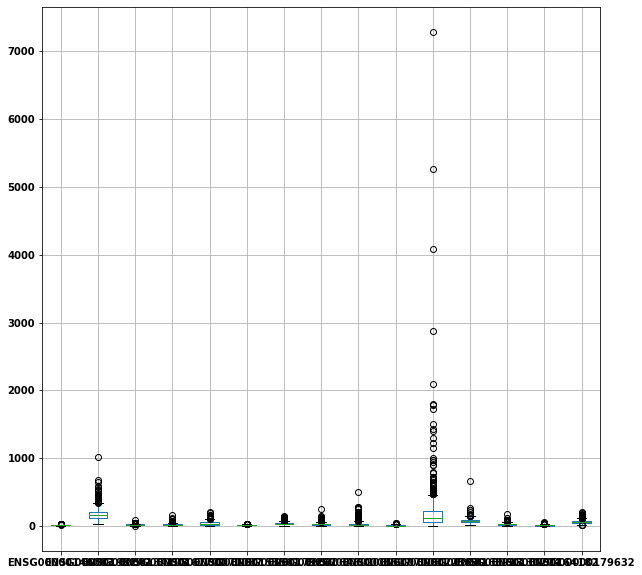

In [19]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

trans_UCEC.iloc[:,0:15].boxplot(figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024C248DCC88>,
      dtype=object)

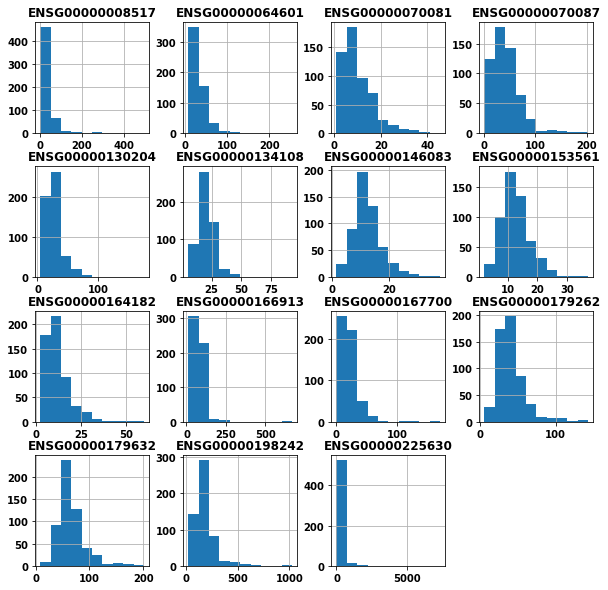

In [20]:
trans_UCEC.iloc[:,0:15].hist(figsize=(10,10))

## Log Transformation

In [21]:
import numpy as np
trans_UCEC = np.log2(trans_UCEC+1)

In [22]:
trans_UCEC.describe()

Transcript,ENSG00000146083,ENSG00000198242,ENSG00000134108,ENSG00000167700,ENSG00000070087,ENSG00000153561,ENSG00000179262,ENSG00000064601,ENSG00000008517,ENSG00000070081,...,ENSG00000132004,ENSG00000171867,ENSG00000178209,ENSG00000103266,ENSG00000105968,ENSG00000099991,ENSG00000102265,ENSG00000133313,ENSG00000066044,ENSG00000105063
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,...,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,3.649340,7.349346,4.375892,4.328440,5.094319,3.682477,5.280984,4.932124,4.348325,3.257613,...,3.723438,3.745060,4.464839,4.075285,4.972909,3.875296,7.731623,4.629464,4.200183,4.118064
std,0.579179,0.652122,0.488125,0.776797,1.042864,0.543202,0.593293,0.635174,1.415655,0.834133,...,0.833433,1.163256,0.786027,0.655638,0.478788,0.491324,1.210644,0.696810,0.384390,0.571171
min,1.279023,4.762756,2.686963,1.280699,1.151131,1.554021,2.841297,3.077967,0.388164,0.920634,...,1.263490,0.813438,2.304726,0.407567,3.251350,2.067723,3.007758,2.516312,2.350690,1.361874
25%,3.356134,6.975518,4.153323,3.825786,4.544342,3.361715,4.965083,4.570947,3.362775,2.632992,...,3.172806,2.915126,3.898042,3.754408,4.643483,3.587918,6.948617,4.194088,3.982820,3.855246
50%,3.665927,7.338626,4.429881,4.311812,5.234501,3.707214,5.250583,4.889782,4.416307,3.248996,...,3.704800,3.798724,4.451903,4.110788,4.947119,3.909922,7.747031,4.673293,4.226312,4.180646
75%,3.993347,7.738771,4.647041,4.808972,5.809374,4.036863,5.611651,5.241881,5.272666,3.861348,...,4.267669,4.608291,4.938962,4.472306,5.262070,4.215811,8.520795,5.132351,4.444773,4.481168
max,5.290112,10.002131,6.550934,7.411910,7.665324,5.257832,7.168691,7.997083,8.960121,5.541273,...,6.307354,8.130004,7.467692,5.694253,6.633008,4.959666,11.494455,6.480551,5.242014,5.424823


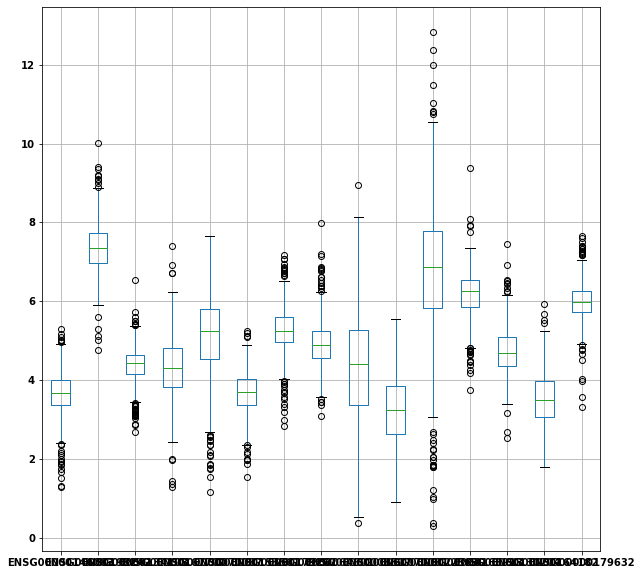

In [23]:
trans_UCEC.iloc[:,0:15].boxplot(figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024C2A67B908>,
      dtype=object)

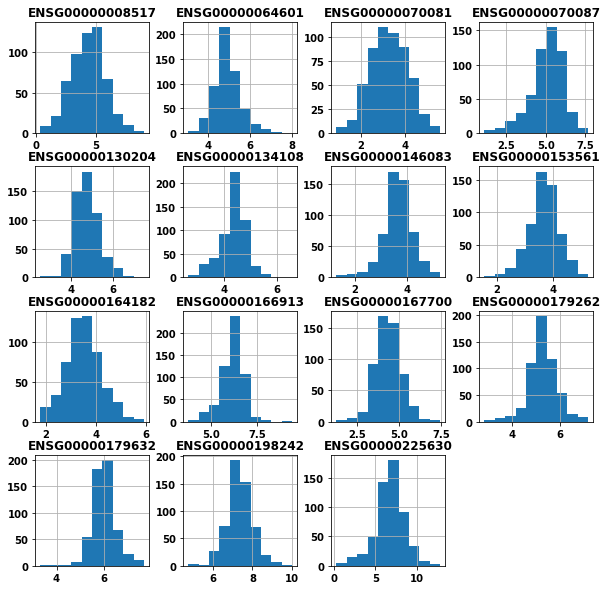

In [24]:
trans_UCEC.iloc[:,0:15].hist(figsize=(10,10))

## z-scores normalization

In [25]:
trans_UCEC = trans_UCEC.sub(trans_UCEC.mean(axis=1), axis=0)
trans_UCEC = trans_UCEC.div(trans_UCEC.std(axis=1), axis=0)

In [26]:
trans_UCEC.describe()

Transcript,ENSG00000146083,ENSG00000198242,ENSG00000134108,ENSG00000167700,ENSG00000070087,ENSG00000153561,ENSG00000179262,ENSG00000064601,ENSG00000008517,ENSG00000070081,...,ENSG00000132004,ENSG00000171867,ENSG00000178209,ENSG00000103266,ENSG00000105968,ENSG00000099991,ENSG00000102265,ENSG00000133313,ENSG00000066044,ENSG00000105063
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,...,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,-0.432382,1.977979,0.043617,-0.007974,0.517504,-0.408252,0.630588,0.394731,0.017172,-0.690561,...,-0.391562,-0.375299,0.091766,-0.166413,0.427623,-0.286692,2.226557,0.212101,-0.074399,-0.126268
std,0.347815,0.378499,0.300842,0.486601,0.658323,0.323786,0.342787,0.400315,0.902011,0.527556,...,0.513372,0.765369,0.531616,0.388515,0.287445,0.306660,0.771612,0.425822,0.205133,0.320968
min,-1.393765,0.464933,-0.794292,-1.560219,-1.937879,-1.264544,-0.550653,-0.572562,-2.250900,-2.174081,...,-1.546903,-2.144953,-1.273906,-1.900836,-0.317745,-1.285125,-0.748137,-0.888562,-0.798858,-1.390959
25%,-0.671729,1.763223,-0.129729,-0.336397,0.150946,-0.623405,0.425674,0.155135,-0.592017,-1.069118,...,-0.756802,-0.921908,-0.275251,-0.412202,0.225324,-0.484059,1.742423,-0.090926,-0.196861,-0.320920
50%,-0.443725,1.986156,0.043698,-0.015932,0.595410,-0.435093,0.600401,0.360732,0.037408,-0.725183,...,-0.416727,-0.340444,0.073643,-0.155006,0.399370,-0.278182,2.264926,0.225781,-0.082865,-0.113350
75%,-0.236370,2.204128,0.217210,0.305812,0.966616,-0.210770,0.824495,0.581899,0.602577,-0.324764,...,-0.057064,0.190806,0.422981,0.090119,0.609757,-0.086662,2.752675,0.521194,0.054522,0.081078
max,0.625673,3.940043,1.809932,1.694475,2.483055,1.028862,1.849801,2.548430,2.497656,0.799440,...,1.266347,2.430386,2.010035,0.986722,1.491898,0.622092,4.567421,1.389935,0.603832,0.682298


## Clustering of patients (samples)

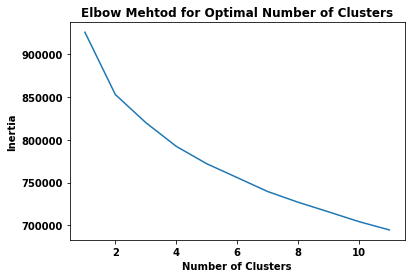

In [27]:
from sklearn.cluster import KMeans

inertias = []

for i in range (1,12):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(trans_UCEC)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,12), inertias) 
plt.title('Elbow Mehtod for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [28]:
from kneed import KneeLocator
clusters_df = pd.DataFrame({"clusters_error" : inertias, "num_clusters" : range(1, 12)}) 

elbow = KneeLocator(clusters_df.num_clusters.values, clusters_df.clusters_error.values, S=1.0, curve='convex', direction='decreasing')

clusters = elbow.knee
print('create a K-means cluster with ' + str(clusters) + ' clusters')

create a K-means cluster with 4 clusters


In [29]:
kmeans= KMeans(n_clusters=clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(trans_UCEC)

for i in range(clusters):
    print('Clusters ' + str(i) + ' : ' + str(sum(pred_y == i)))

Clusters 0 : 139
Clusters 1 : 113
Clusters 2 : 160
Clusters 3 : 136


In [30]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(trans_UCEC)

principalComponents

array([[-28.65991077,  -7.61997289],
       [-15.88801605,  -4.02513506],
       [-13.87821703,   1.16675727],
       ...,
       [  7.19533119,  -3.98112846],
       [ -9.21309507,   0.92920394],
       [ 17.87401971,  10.27412864]])

In [31]:
principal_Df = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [32]:
principal_Df['Cluster'] = pred_y

principal_Df

,principal component 1,principal component 2,Cluster
0,-28.659911,-7.619973,3
1,-15.888016,-4.025135,3
2,-13.878217,1.166757,2
3,-23.000046,-12.924974,3
4,14.260255,-6.870145,0
...,...,...,...
543,-4.010912,-21.202246,1
544,1.038598,-10.635379,3
545,7.195331,-3.981128,1
546,-9.213095,0.929204,2


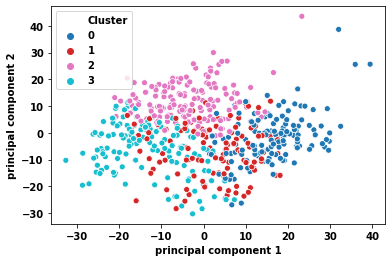

In [33]:
sns.scatterplot(x='principal component 1',y='principal component 2',data=principal_Df,hue='Cluster',palette='tab10')

In [34]:
clinical = pd.read_csv('UCEC_clinical.csv')
clinical

,case_id,case_submitter_id,project_id,age_at_index,age_is_obfuscated,cause_of_death,cause_of_death_source,country_of_residence_at_enrollment,days_to_birth,days_to_death,...,treatment_arm,treatment_dose,treatment_dose_units,treatment_effect,treatment_effect_indicator,treatment_frequency,treatment_intent_type,treatment_or_therapy,treatment_outcome,treatment_type
0,2f4458b6-3caf-4e33-890e-a04722badd1b,TCGA-A5-A0GB,TCGA-UCEC,65,'--,'--,'--,'--,-23883,'--,...,'--,'--,'--,'--,'--,'--,'--,no,'--,"Pharmaceutical Therapy, NOS"
1,2f4458b6-3caf-4e33-890e-a04722badd1b,TCGA-A5-A0GB,TCGA-UCEC,65,'--,'--,'--,'--,-23883,'--,...,'--,'--,'--,'--,'--,'--,'--,yes,'--,"Radiation Therapy, NOS"
2,9aa8c2b4-db32-4899-bf0c-d578cb175e90,TCGA-AP-A0L8,TCGA-UCEC,70,'--,'--,'--,'--,-25733,1484,...,'--,'--,'--,'--,'--,'--,'--,no,'--,"Pharmaceutical Therapy, NOS"
3,9aa8c2b4-db32-4899-bf0c-d578cb175e90,TCGA-AP-A0L8,TCGA-UCEC,70,'--,'--,'--,'--,-25733,1484,...,'--,'--,'--,'--,'--,'--,'--,yes,'--,"Radiation Therapy, NOS"
4,45d58088-d3f4-4eb0-b75c-bcb98c0981dc,TCGA-A5-A0G9,TCGA-UCEC,79,'--,'--,'--,'--,-29122,'--,...,'--,'--,'--,'--,'--,'--,'--,no,'--,"Radiation Therapy, NOS"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1081,16e69011-c295-479f-b521-86e66fba498d,TCGA-D1-A16G,TCGA-UCEC,74,'--,'--,'--,'--,-27065,834,...,'--,'--,'--,'--,'--,'--,'--,yes,'--,"Radiation Therapy, NOS"
1082,f054a123-322f-444a-9971-53d3df371753,TCGA-D1-A1O5,TCGA-UCEC,61,'--,'--,'--,'--,-22580,'--,...,'--,'--,'--,'--,'--,'--,'--,no,'--,"Radiation Therapy, NOS"
1083,f054a123-322f-444a-9971-53d3df371753,TCGA-D1-A1O5,TCGA-UCEC,61,'--,'--,'--,'--,-22580,'--,...,'--,'--,'--,'--,'--,'--,'--,no,'--,"Pharmaceutical Therapy, NOS"
1084,53707bb3-426a-43cb-830f-3eeed930295f,TCGA-A5-A0G1,TCGA-UCEC,67,'--,'--,'--,'--,-24477,3251,...,'--,'--,'--,'--,'--,'--,'--,yes,'--,"Radiation Therapy, NOS"


In [35]:
clinical = clinical[['case_submitter_id', 'days_to_death', 'vital_status', 'days_to_last_follow_up']]
clinical

,case_submitter_id,days_to_death,vital_status,days_to_last_follow_up
0,TCGA-A5-A0GB,'--,Alive,997
1,TCGA-A5-A0GB,'--,Alive,997
2,TCGA-AP-A0L8,1484,Dead,'--
3,TCGA-AP-A0L8,1484,Dead,'--
4,TCGA-A5-A0G9,'--,Alive,2540
...,...,...,...,...
1081,TCGA-D1-A16G,834,Dead,'--
1082,TCGA-D1-A1O5,'--,Alive,458
1083,TCGA-D1-A1O5,'--,Alive,458
1084,TCGA-A5-A0G1,3251,Dead,'--


In [36]:
clinical = clinical.set_index('case_submitter_id')

In [37]:
clinical['event'] = clinical.apply(lambda x: 1 if x['vital_status'] == 'Dead' else 0, axis=1)
clinical = clinical.drop('vital_status', axis=1)

In [38]:
clinical['duration'] = clinical.apply(lambda x: x['days_to_last_follow_up'] if x['event'] == 0 else x['days_to_death'], axis=1)

In [39]:
clinical = clinical.drop('days_to_death', axis=1)
clinical = clinical.drop('days_to_last_follow_up', axis=1)

In [40]:
clinical

,event,duration
case_submitter_id,,
TCGA-A5-A0GB,0,997
TCGA-A5-A0GB,0,997
TCGA-AP-A0L8,1,1484
TCGA-AP-A0L8,1,1484
TCGA-A5-A0G9,0,2540
...,...,...
TCGA-D1-A16G,1,834
TCGA-D1-A1O5,0,458
TCGA-D1-A1O5,0,458


In [41]:
trans_UCEC['cluster'] = pred_y

In [54]:
trans_UCEC.to_csv('patientsWithClusters.csv')

In [42]:
df_survival = trans_UCEC[['cluster']]

In [43]:
df_survival = df_survival.rename(index=lambda x: x.split("-01A",1)[0])

In [44]:
clinical = clinical.drop_duplicates()

In [45]:
survival_result = pd.concat([clinical, df_survival], axis=1, join='inner')

In [46]:
#number of rows before concating with clinical data was 548
survival_result

,event,duration,cluster
TCGA-A5-A0GB,0,997,2
TCGA-AP-A0L8,1,1484,0
TCGA-A5-A0G9,0,2540,3
TCGA-AX-A05Y,0,2684,3
TCGA-BG-A0MO,0,1309,2
...,...,...,...
TCGA-AX-A1CF,0,2337,1
TCGA-D1-A17U,0,697,2
TCGA-D1-A16G,1,834,1
TCGA-D1-A1O5,0,458,3


## Survival Analysis

### with KaplanMeier Curve

In [60]:
survival_result.dtypes

event        int64
duration    object
cluster      int32
dtype: object

In [61]:
survival_result = survival_result[survival_result.duration != '\'--']

In [62]:
survival_result = survival_result.astype({"duration": float})

In [63]:
survival_result.dtypes

event         int64
duration    float64
cluster       int32
dtype: object

In [64]:
survival_result

,event,duration,cluster
TCGA-A5-A0GB,0,997.0,2
TCGA-AP-A0L8,1,1484.0,0
TCGA-A5-A0G9,0,2540.0,3
TCGA-AX-A05Y,0,2684.0,3
TCGA-BG-A0MO,0,1309.0,2
...,...,...,...
TCGA-AX-A1CF,0,2337.0,1
TCGA-D1-A17U,0,697.0,2
TCGA-D1-A16G,1,834.0,1
TCGA-D1-A1O5,0,458.0,3


In [66]:
result_kaplan = pd.concat([survival_result,pd.get_dummies(survival_result['cluster'], prefix='cluster')], axis=1, ignore_index=False)
result_kaplan

,event,duration,cluster,cluster_0,cluster_1,cluster_2,cluster_3
TCGA-A5-A0GB,0,997.0,2,0,0,1,0
TCGA-AP-A0L8,1,1484.0,0,1,0,0,0
TCGA-A5-A0G9,0,2540.0,3,0,0,0,1
TCGA-AX-A05Y,0,2684.0,3,0,0,0,1
TCGA-BG-A0MO,0,1309.0,2,0,0,1,0
...,...,...,...,...,...,...,...
TCGA-AX-A1CF,0,2337.0,1,0,1,0,0
TCGA-D1-A17U,0,697.0,2,0,0,1,0
TCGA-D1-A16G,1,834.0,1,0,1,0,0
TCGA-D1-A1O5,0,458.0,3,0,0,0,1


In [67]:
result_kaplan.drop(['cluster'],axis=1, inplace=True)

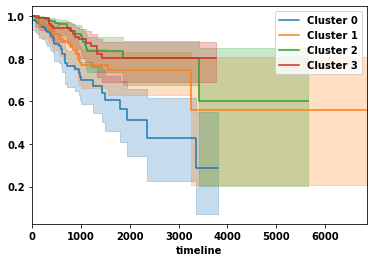

In [69]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()

T = result_kaplan["duration"]
E = result_kaplan["event"]

cluster0 = result_kaplan['cluster_0']
cluster1 = result_kaplan['cluster_1']
cluster2 = result_kaplan['cluster_2']
cluster3 = result_kaplan['cluster_3']

ix1 = (cluster0 == 1)
ix2 = (cluster1 == 1)
ix3 = (cluster2 == 1)
ix4 = (cluster3 == 1)

kmf.fit(T[ix1], E[ix1], label='Cluster 0')
ax = kmf.plot()

kmf.fit(T[ix2], E[ix2], label='Cluster 1')
ax = kmf.plot()

kmf.fit(T[ix3], E[ix3], label='Cluster 2')
ax = kmf.plot()

kmf.fit(T[ix4], E[ix4], label='Cluster 3')
ax = kmf.plot()

plt.show()

### with CoxPHFitter

In [70]:
from lifelines import CoxPHFitter
cph = CoxPHFitter()
for i in range(4):
    cph = CoxPHFitter()
    cph.fit(result_kaplan[['duration', 'event', 'cluster_'+str(i)]], duration_col='duration', event_col='event')
    cph.print_summary()
    print('/*********************************************************************************/')

<lifelines.CoxPHFitter: fitted with 498 total observations, 410 right-censored observations>
             duration col = 'duration'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 498
number of events observed = 88
   partial log-likelihood = -482.70
         time fit was run = 2021-01-05 16:33:54 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
cluster_0   0.95       2.58       0.22             0.52             1.38                 1.68                 3.96

             z      p   -log2(p)
covariate                       
cluster_0 4.32 <0.005      15.94
---
Concordance = 0.60
Partial AIC = 967.40
log-likelihood ratio test = 16.99 on 1 df
-log2(p) of ll-ratio test = 14.70

/*********************************************************************************/


<lifelines.CoxPHFitter: fitted with 498 total observations, 410 right-censored observations>
             duration col = 'duration'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 498
number of events observed = 88
   partial log-likelihood = -491.15
         time fit was run = 2021-01-05 16:33:56 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
cluster_1   0.08       1.08       0.25            -0.41             0.57                 0.66                 1.77

             z    p   -log2(p)
covariate                     
cluster_1 0.32 0.75       0.41
---
Concordance = 0.51
Partial AIC = 984.29
log-likelihood ratio test = 0.10 on 1 df
-log2(p) of ll-ratio test = 0.41

/*********************************************************************************/


<lifelines.CoxPHFitter: fitted with 498 total observations, 410 right-censored observations>
             duration col = 'duration'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 498
number of events observed = 88
   partial log-likelihood = -488.44
         time fit was run = 2021-01-05 16:33:56 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
cluster_2  -0.60       0.55       0.27            -1.13            -0.07                 0.32                 0.93

              z    p   -log2(p)
covariate                      
cluster_2 -2.22 0.03       5.23
---
Concordance = 0.57
Partial AIC = 978.87
log-likelihood ratio test = 5.52 on 1 df
-log2(p) of ll-ratio test = 5.73

/*********************************************************************************/


<lifelines.CoxPHFitter: fitted with 498 total observations, 410 right-censored observations>
             duration col = 'duration'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 498
number of events observed = 88
   partial log-likelihood = -488.92
         time fit was run = 2021-01-05 16:33:56 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
cluster_3  -0.57       0.57       0.28            -1.13            -0.01                 0.32                 0.99

              z    p   -log2(p)
covariate                      
cluster_3 -2.01 0.04       4.49
---
Concordance = 0.54
Partial AIC = 979.84
log-likelihood ratio test = 4.55 on 1 df
-log2(p) of ll-ratio test = 4.93

/*********************************************************************************/


## Reading genes file after filtering out pseudo genes

In [47]:
filtered_genes = pd.read_csv('uniprot_all_genes_draft_4.tab', sep='\t')

In [48]:
filtered_genes = filtered_genes.rename(columns={'yourlist:M20210105E5A08BB0B2D1C45B0C7BC3B55FD265560AE463Q' : 'Transcript'})

In [49]:
filtered_genes = filtered_genes.drop('isomap:M20210105E5A08BB0B2D1C45B0C7BC3B55FD265560AE463Q', axis=1)

In [50]:
filtered_genes = filtered_genes.set_index('Transcript')

In [51]:
filtered_genes

,Entry,Entry name,Status,Protein names,Gene names,Length,Ensembl transcript,Gene ontology (biological process),Gene ontology (cellular component),Gene ontology (molecular function),Organism ID
Transcript,,,,,,,,,,,
ENSG00000146083,Q7L0R7,RNF44_HUMAN,reviewed,RING finger protein 44,RNF44 KIAA1100,432,ENST00000274811 [Q7L0R7-1];,NaN,NaN,metal ion binding [GO:0046872],9606
ENSG00000198242,P62750,RL23A_HUMAN,reviewed,60S ribosomal protein L23a (Large ribosomal su...,RPL23A,156,ENST00000422514;,"nuclear-transcribed mRNA catabolic process, no...",cytoplasm [GO:0005737]; cytosol [GO:0005829]; ...,cadherin binding [GO:0045296]; RNA binding [GO...,9606
ENSG00000134108,Q9NVJ2,ARL8B_HUMAN,reviewed,ADP-ribosylation factor-like protein 8B (ADP-r...,ARL8B ARL10C GIE1,186,ENST00000256496 [Q9NVJ2-1];ENST00000419534 [Q9...,anterograde axonal transport [GO:0008089]; cel...,axon cytoplasm [GO:1904115]; cytoplasm [GO:000...,alpha-tubulin binding [GO:0043014]; beta-tubul...,9606
ENSG00000167700,Q96ES6,MFSD3_HUMAN,reviewed,Major facilitator superfamily domain-containin...,MFSD3,412,ENST00000301327;,NaN,integral component of membrane [GO:0016021],solute:proton symporter activity [GO:0015295],9606
ENSG00000070087,P35080,PROF2_HUMAN,reviewed,Profilin-2 (Profilin II),PFN2,140,ENST00000239940 [P35080-1];ENST00000452853 [P3...,actin cytoskeleton organization [GO:0030036]; ...,cytoplasm [GO:0005737]; cytoskeleton [GO:00058...,actin binding [GO:0003779]; actin monomer bind...,9606
...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000099991,Q9Y6J0,CABIN_HUMAN,reviewed,Calcineurin-binding protein cabin-1 (Calcineur...,CABIN1 KIAA0330,2220,ENST00000263119 [Q9Y6J0-1];ENST00000398319 [Q9...,cell surface receptor signaling pathway [GO:00...,aggresome [GO:0016235]; cytosol [GO:0005829]; ...,protein phosphatase inhibitor activity [GO:000...,9606
ENSG00000102265,P01033,TIMP1_HUMAN,reviewed,Metalloproteinase inhibitor 1 (Erythroid-poten...,TIMP1 CLGI TIMP,207,ENST00000218388;,aging [GO:0007568]; cartilage development [GO:...,basement membrane [GO:0005604]; endoplasmic re...,cytokine activity [GO:0005125]; growth factor ...,9606
ENSG00000133313,Q96KP4,CNDP2_HUMAN,reviewed,Cytosolic non-specific dipeptidase (EC 3.4.13....,CNDP2 CN2 CPGL HEL-S-13 PEPA,475,ENST00000324262 [Q96KP4-1];ENST00000324301 [Q9...,glutathione biosynthetic process [GO:0006750];...,cytosol [GO:0005829]; extracellular exosome [G...,alanylglutamate dipeptidase activity [GO:01030...,9606


In [67]:
result_genes = pd.DataFrame(filtered_genes['Entry'])

In [68]:
result_genes

,Entry
Transcript,
ENSG00000146083,Q7L0R7
ENSG00000198242,P62750
ENSG00000134108,Q9NVJ2
ENSG00000167700,Q96ES6
ENSG00000070087,P35080
...,...
ENSG00000099991,Q9Y6J0
ENSG00000102265,P01033
ENSG00000133313,Q96KP4


### Remove duplicate genes from Dataframe

In [69]:
genes_list = list(result_genes.index)
genes_counts = Counter(genes_list)

In [70]:
doup_genes = dict((k, v) for k, v in genes_counts.items() if v > 1)

In [71]:
doup_genes

{'ENSG00000186184': 2,
 'ENSG00000196531': 2,
 'ENSG00000087460': 4,
 'ENSG00000120802': 2,
 'ENSG00000127922': 2,
 'ENSG00000176087': 2,
 'ENSG00000147889': 2,
 'ENSG00000109113': 2,
 'ENSG00000100300': 2,
 'ENSG00000149806': 2}

In [72]:
result_genes.shape

(5296, 1)

In [73]:
result_genes = result_genes.loc[~result_genes.index.duplicated(),:]

In [74]:
result_genes.shape

(5284, 1)

In [75]:
result_genes = pd.concat([result_genes, UCEC], axis=1, join='inner')

In [76]:
result_genes

,Entry,TCGA-D1-A17L-01A,TCGA-A5-A0GI-01A,TCGA-D1-A160-01A,TCGA-D1-A16X-01A,TCGA-AX-A1C8-01A,TCGA-BK-A13C-01A,TCGA-D1-A175-01A,TCGA-AX-A06J-01A,TCGA-BS-A0UT-01A,...,TCGA-B5-A11R-01A,TCGA-A5-A1OH-01A,TCGA-EY-A1GC-01A,TCGA-D1-A1O5-01A,TCGA-AP-A05J-01A,TCGA-DF-A2KU-01A,TCGA-AX-A3G8-01A,TCGA-AJ-A3EL-01A,TCGA-AP-A1DM-01A,TCGA-BG-A220-01A
Transcript,,,,,,,,,,,,,,,,,,,,,
ENSG00000146083,Q7L0R7,13.011391,11.427045,10.787671,16.083836,11.842547,9.902156,11.470896,17.094628,13.262287,...,9.291159,9.003191,6.764077,12.795741,9.620348,4.114064,2.688903,7.010887,16.573846,22.948267
ENSG00000198242,P62750,137.456077,293.805262,174.082556,193.279954,94.698071,151.531153,184.117366,255.666425,122.838004,...,244.375420,217.825438,155.020175,165.234450,224.319879,235.216379,547.672135,197.256088,169.015276,156.694658
ENSG00000134108,Q9NVJ2,16.458143,12.741908,18.379668,10.560327,17.770202,29.477545,15.008244,9.199840,13.205734,...,32.337343,22.464290,42.170139,22.702420,6.338493,15.828921,19.811603,13.610094,16.869509,25.560686
ENSG00000167700,Q96ES6,14.473938,24.901977,27.118570,44.546959,33.372229,21.914281,17.668392,29.588563,12.823318,...,24.353425,21.570506,20.957440,18.702100,18.792150,28.325632,49.205548,18.468799,22.009018,23.979946
ENSG00000070087,P35080,11.524599,27.999849,27.288790,28.698825,31.571146,33.536484,47.846396,60.828217,10.381238,...,122.174201,94.306692,31.521402,32.076335,11.600653,23.180255,17.962744,80.321153,20.302258,80.011071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000099991,Q9Y6J0,18.630183,14.273012,14.402849,27.648228,11.971483,16.376858,17.984327,29.274684,18.644347,...,13.536106,7.637279,6.589883,15.323897,14.793158,10.819996,7.908150,10.823759,17.108140,16.702291
ENSG00000102265,P01033,135.163794,307.567192,334.720191,182.630607,276.215469,82.458114,52.772302,28.092107,1585.070243,...,39.180021,110.825452,611.199593,1057.281165,65.806864,368.778993,928.751388,241.652880,481.822078,108.519328
ENSG00000133313,Q96KP4,30.779709,26.219112,22.659957,60.480337,27.844254,23.084527,51.379765,31.351872,12.502707,...,23.738550,8.950659,9.128646,28.470640,8.147827,19.501944,9.290533,23.800013,20.052048,16.784600


In [77]:
result_genes = result_genes.drop('Entry', axis=1)

In [78]:
result_genes

,TCGA-D1-A17L-01A,TCGA-A5-A0GI-01A,TCGA-D1-A160-01A,TCGA-D1-A16X-01A,TCGA-AX-A1C8-01A,TCGA-BK-A13C-01A,TCGA-D1-A175-01A,TCGA-AX-A06J-01A,TCGA-BS-A0UT-01A,TCGA-AX-A1C5-01A,...,TCGA-B5-A11R-01A,TCGA-A5-A1OH-01A,TCGA-EY-A1GC-01A,TCGA-D1-A1O5-01A,TCGA-AP-A05J-01A,TCGA-DF-A2KU-01A,TCGA-AX-A3G8-01A,TCGA-AJ-A3EL-01A,TCGA-AP-A1DM-01A,TCGA-BG-A220-01A
Transcript,,,,,,,,,,,,,,,,,,,,,
ENSG00000146083,13.011391,11.427045,10.787671,16.083836,11.842547,9.902156,11.470896,17.094628,13.262287,13.541330,...,9.291159,9.003191,6.764077,12.795741,9.620348,4.114064,2.688903,7.010887,16.573846,22.948267
ENSG00000198242,137.456077,293.805262,174.082556,193.279954,94.698071,151.531153,184.117366,255.666425,122.838004,245.755510,...,244.375420,217.825438,155.020175,165.234450,224.319879,235.216379,547.672135,197.256088,169.015276,156.694658
ENSG00000134108,16.458143,12.741908,18.379668,10.560327,17.770202,29.477545,15.008244,9.199840,13.205734,18.851129,...,32.337343,22.464290,42.170139,22.702420,6.338493,15.828921,19.811603,13.610094,16.869509,25.560686
ENSG00000167700,14.473938,24.901977,27.118570,44.546959,33.372229,21.914281,17.668392,29.588563,12.823318,46.255754,...,24.353425,21.570506,20.957440,18.702100,18.792150,28.325632,49.205548,18.468799,22.009018,23.979946
ENSG00000070087,11.524599,27.999849,27.288790,28.698825,31.571146,33.536484,47.846396,60.828217,10.381238,49.661967,...,122.174201,94.306692,31.521402,32.076335,11.600653,23.180255,17.962744,80.321153,20.302258,80.011071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000099991,18.630183,14.273012,14.402849,27.648228,11.971483,16.376858,17.984327,29.274684,18.644347,19.859028,...,13.536106,7.637279,6.589883,15.323897,14.793158,10.819996,7.908150,10.823759,17.108140,16.702291
ENSG00000102265,135.163794,307.567192,334.720191,182.630607,276.215469,82.458114,52.772302,28.092107,1585.070243,86.173760,...,39.180021,110.825452,611.199593,1057.281165,65.806864,368.778993,928.751388,241.652880,481.822078,108.519328
ENSG00000133313,30.779709,26.219112,22.659957,60.480337,27.844254,23.084527,51.379765,31.351872,12.502707,27.286406,...,23.738550,8.950659,9.128646,28.470640,8.147827,19.501944,9.290533,23.800013,20.052048,16.784600


In [79]:
result_genes.describe()

,TCGA-D1-A17L-01A,TCGA-A5-A0GI-01A,TCGA-D1-A160-01A,TCGA-D1-A16X-01A,TCGA-AX-A1C8-01A,TCGA-BK-A13C-01A,TCGA-D1-A175-01A,TCGA-AX-A06J-01A,TCGA-BS-A0UT-01A,TCGA-AX-A1C5-01A,...,TCGA-B5-A11R-01A,TCGA-A5-A1OH-01A,TCGA-EY-A1GC-01A,TCGA-D1-A1O5-01A,TCGA-AP-A05J-01A,TCGA-DF-A2KU-01A,TCGA-AX-A3G8-01A,TCGA-AJ-A3EL-01A,TCGA-AP-A1DM-01A,TCGA-BG-A220-01A
count,5283.000000,5283.000000,5283.000000,5283.000000,5283.000000,5283.000000,5283.000000,5283.000000,5283.000000,5283.000000,...,5283.000000,5283.000000,5283.000000,5283.000000,5283.000000,5283.000000,5283.000000,5283.000000,5283.000000,5283.000000
mean,80.753363,61.541607,68.221305,58.684483,68.510272,45.786708,48.076837,58.000284,67.846195,47.372462,...,48.697465,49.863898,58.445865,60.926575,65.843513,60.647716,67.249504,51.574082,57.460048,47.999214
std,879.424388,436.579805,573.204669,467.390066,724.779550,207.103588,279.429488,372.203836,627.401939,164.283964,...,184.118802,324.433409,278.452851,482.475160,636.136587,292.821727,470.989054,184.126650,342.636636,237.705462
min,0.052976,0.035641,0.067213,0.242722,0.000000,0.000000,0.025802,0.000000,0.000000,0.000000,...,0.047590,0.000000,0.031615,0.056454,0.000000,0.026839,0.000000,0.004506,0.000000,0.000000
25%,7.524543,9.774493,9.695453,8.210012,8.927883,9.884373,11.094368,6.930380,8.424477,10.140581,...,10.550249,9.492100,9.663477,9.479903,5.544262,8.851037,7.032428,11.090051,10.102859,11.265471
50%,14.104064,16.612872,15.834536,15.699658,15.262955,16.791738,17.816848,14.074563,14.412665,17.182823,...,17.678300,16.741270,17.693823,15.760859,12.082298,18.295596,14.325138,18.918046,17.156741,18.196386
75%,29.732104,33.203178,31.666000,32.717315,30.538732,31.363701,33.293010,30.395494,28.226822,33.809164,...,33.807828,32.953194,36.110304,29.903713,27.858422,40.387450,34.607716,37.036936,34.769485,33.616770
max,28443.430880,14738.946072,17020.021731,28895.433398,22756.068901,5643.164451,8740.098204,12446.071184,20252.964903,3956.695919,...,5750.170590,11096.963943,7659.985436,14380.093910,24157.719774,14122.324080,23321.354594,6486.347468,12553.961548,7814.760436


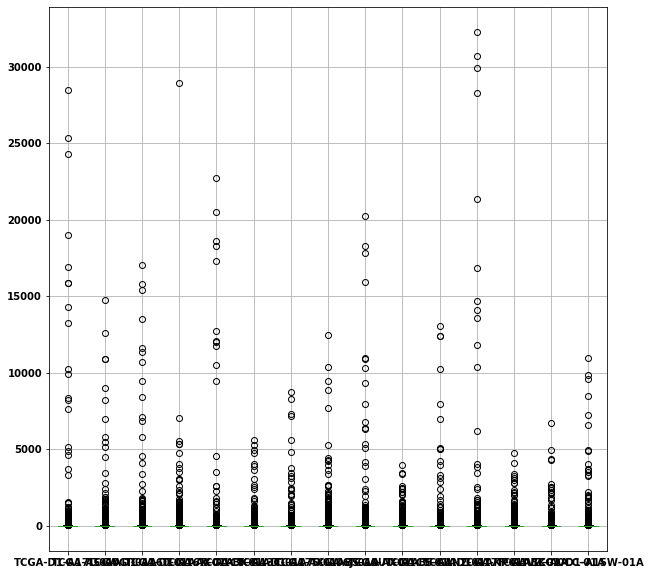

In [80]:
result_genes.iloc[:,0:15].boxplot(figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024C2CAAC9C8>,
      dtype=object)

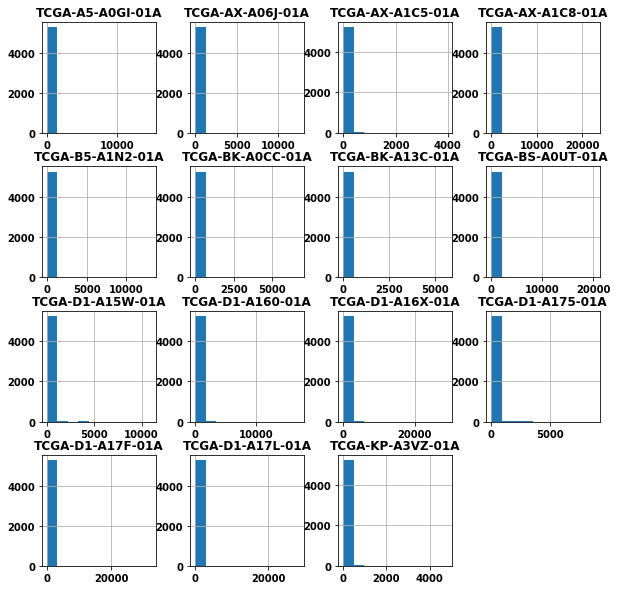

In [81]:
result_genes.iloc[:,0:15].hist(figsize=(10,10))

## Log Transformation

In [82]:
import numpy as np
result_genes = np.log2(result_genes+1)

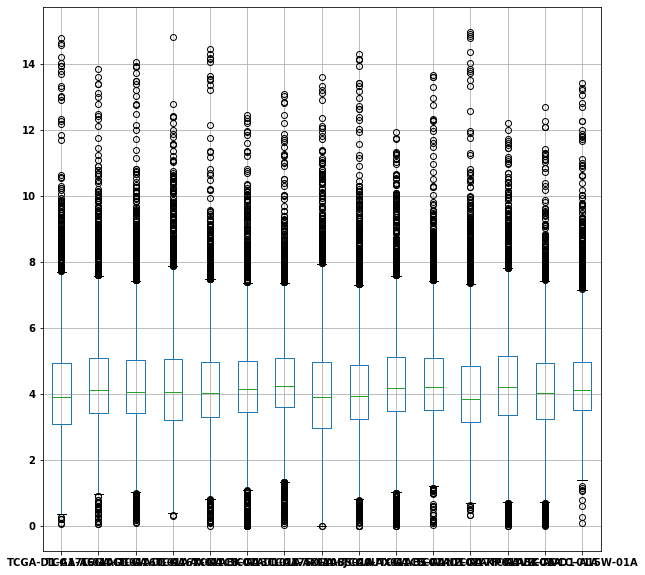

In [83]:
result_genes.iloc[:,0:15].boxplot(figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024C2D790488>,
      dtype=object)

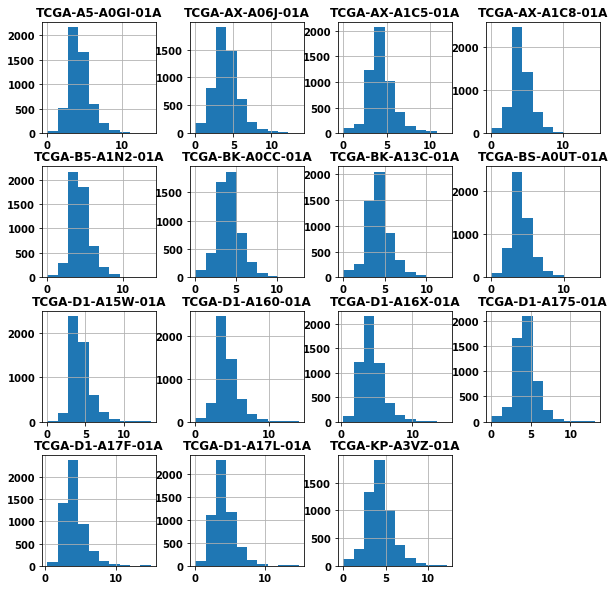

In [84]:
result_genes.iloc[:,0:15].hist(figsize=(10,10))

In [85]:
result_genes.describe()

,TCGA-D1-A17L-01A,TCGA-A5-A0GI-01A,TCGA-D1-A160-01A,TCGA-D1-A16X-01A,TCGA-AX-A1C8-01A,TCGA-BK-A13C-01A,TCGA-D1-A175-01A,TCGA-AX-A06J-01A,TCGA-BS-A0UT-01A,TCGA-AX-A1C5-01A,...,TCGA-B5-A11R-01A,TCGA-A5-A1OH-01A,TCGA-EY-A1GC-01A,TCGA-D1-A1O5-01A,TCGA-AP-A05J-01A,TCGA-DF-A2KU-01A,TCGA-AX-A3G8-01A,TCGA-AJ-A3EL-01A,TCGA-AP-A1DM-01A,TCGA-BG-A220-01A
count,5283.000000,5283.000000,5283.000000,5283.000000,5283.000000,5283.000000,5283.000000,5283.000000,5283.000000,5283.000000,...,5283.000000,5283.000000,5283.000000,5283.000000,5283.000000,5283.000000,5283.000000,5283.000000,5283.000000,5283.000000
mean,4.143687,4.384630,4.349204,4.276838,4.233559,4.297263,4.384286,4.092471,4.184413,4.384530,...,4.446463,4.288152,4.429846,4.311239,3.904296,4.421432,4.187324,4.534586,4.435348,4.435730
std,1.600691,1.520540,1.508791,1.604068,1.513220,1.518713,1.423883,1.707520,1.555127,1.513970,...,1.469397,1.542749,1.615758,1.467429,1.779875,1.763840,1.843192,1.512429,1.505517,1.446308
min,0.074472,0.050524,0.093848,0.313504,0.000000,0.000000,0.036752,0.000000,0.000000,0.000000,...,0.067074,0.000000,0.044904,0.079230,0.000000,0.038210,0.000000,0.006486,0.000000,0.000000
25%,3.091622,3.429548,3.418926,3.203203,3.311486,3.444186,3.596263,2.987390,3.236412,3.477752,...,3.529852,3.391232,3.414606,3.389553,2.710231,3.300276,3.005836,3.595748,3.472859,3.616531
50%,3.916865,4.138558,4.073352,4.061747,4.023517,4.153136,4.233953,3.914044,3.946044,4.184504,...,4.223291,4.149037,4.224490,4.067024,3.709544,4.270200,3.937828,4.316004,4.182433,4.262763
75%,4.941675,5.096058,5.029718,5.075418,4.979053,5.016305,5.099843,4.972486,4.869221,5.121395,...,5.121340,5.085475,5.213748,4.949708,4.850921,5.371121,5.154118,5.249329,5.160655,5.113399
max,14.795859,13.847444,14.055030,14.818604,14.474027,12.462544,13.093599,13.603519,14.305917,11.950445,...,12.489640,13.438007,12.903314,13.811886,14.560256,13.785792,14.509426,12.663413,13.615970,12.932171


## z-scores normalization

In [86]:
result_genes = result_genes.sub(result_genes.mean(axis=1), axis=0)
result_genes = result_genes.div(result_genes.std(axis=1), axis=0)

In [87]:
result_genes.describe()

,TCGA-D1-A17L-01A,TCGA-A5-A0GI-01A,TCGA-D1-A160-01A,TCGA-D1-A16X-01A,TCGA-AX-A1C8-01A,TCGA-BK-A13C-01A,TCGA-D1-A175-01A,TCGA-AX-A06J-01A,TCGA-BS-A0UT-01A,TCGA-AX-A1C5-01A,...,TCGA-B5-A11R-01A,TCGA-A5-A1OH-01A,TCGA-EY-A1GC-01A,TCGA-D1-A1O5-01A,TCGA-AP-A05J-01A,TCGA-DF-A2KU-01A,TCGA-AX-A3G8-01A,TCGA-AJ-A3EL-01A,TCGA-AP-A1DM-01A,TCGA-BG-A220-01A
count,5283.000000,5283.000000,5283.000000,5283.000000,5283.000000,5283.000000,5283.000000,5283.000000,5283.000000,5283.000000,...,5283.000000,5283.000000,5283.000000,5283.000000,5283.000000,5283.000000,5283.000000,5283.000000,5283.000000,5283.000000
mean,-0.339881,0.083080,0.012730,-0.212086,-0.120476,0.004714,0.181471,-0.358688,-0.249577,0.108633,...,0.151410,0.034671,0.158138,-0.051210,-0.610310,0.210201,-0.188411,0.301711,0.131053,0.202479
std,1.047923,0.810823,0.675772,1.231008,0.971613,0.994276,0.868834,1.232834,0.942373,0.850078,...,0.896892,1.095586,1.119490,0.799367,1.356818,1.285693,1.336135,0.858186,0.757027,0.798358
min,-3.048542,-2.476127,-2.635109,-3.974001,-3.677965,-4.289171,-2.852615,-5.518632,-3.241458,-3.548573,...,-3.816745,-5.118098,-4.281522,-3.873792,-4.564887,-4.667925,-4.974020,-2.971328,-2.830657,-3.685974
25%,-1.125452,-0.472245,-0.427783,-1.089162,-0.734926,-0.665730,-0.396390,-1.269690,-0.920264,-0.433178,...,-0.495141,-0.707736,-0.586355,-0.590496,-1.617205,-0.725642,-1.146982,-0.271630,-0.353943,-0.321708
50%,-0.405400,0.126114,-0.006748,-0.110453,-0.125248,-0.030649,0.185380,-0.363687,-0.314968,0.115519,...,0.135989,0.064844,0.160783,-0.069877,-0.658998,0.194506,-0.270444,0.334111,0.110853,0.236179
75%,0.380559,0.682123,0.443992,0.698643,0.457294,0.616423,0.764383,0.536964,0.374813,0.652058,...,0.772987,0.770438,0.875388,0.455660,0.360899,1.155996,0.766235,0.897210,0.590688,0.731161
max,3.922328,2.994512,3.220477,3.226314,4.670944,5.296255,3.913604,3.883236,3.124605,4.100811,...,3.936677,4.990061,4.630614,3.739619,4.328173,4.264065,4.453508,3.672881,3.545534,3.264993


## Clustering of Genes

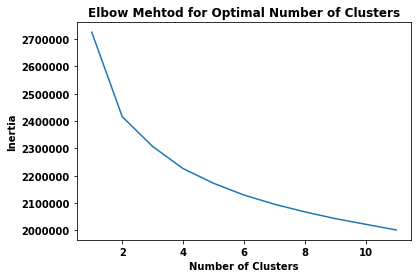

In [88]:
inertias_genes = []

for i in range (1,12):
    kmeans_genes = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans_genes.fit(result_genes)
    inertias_genes.append(kmeans_genes.inertia_)

plt.plot(range(1,12), inertias_genes) 
plt.title('Elbow Mehtod for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [89]:
genes_df = pd.DataFrame({"clusters_error" : inertias_genes, "num_clusters" : range(1, 12)}) 

elbow = KneeLocator(genes_df.num_clusters.values, genes_df.clusters_error.values, S=1.0, curve='convex', direction='decreasing')

genes_clusters = elbow.knee
print('create a K-means cluster with ' + str(genes_clusters) + ' clusters')

create a K-means cluster with 4 clusters


In [90]:
kmeans_genes= KMeans(n_clusters=genes_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
genes_pred_y = kmeans_genes.fit_predict(result_genes)

for i in range(genes_clusters):
    print('Clusters ' + str(i) + ' : ' + str(sum(genes_pred_y == i)))

Clusters 0 : 1205
Clusters 1 : 1303
Clusters 2 : 1218
Clusters 3 : 1557


In [91]:
genes_pca = PCA(n_components=2)
genes_principalComponents = genes_pca.fit_transform(result_genes)

genes_principalComponents

array([[ -5.12170978,  -9.08082621],
       [  7.98289149,   7.92793008],
       [-13.47267185,   0.21600319],
       ...,
       [  0.66555585,  -9.94326404],
       [ -7.78810019,   0.63971893],
       [ -1.5875379 ,  -8.58311996]])

In [92]:
genes_principal_Df = pd.DataFrame(data = genes_principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [93]:
genes_principal_Df['Cluster'] = genes_pred_y

genes_principal_Df

,principal component 1,principal component 2,Cluster
0,-5.121710,-9.080826,2
1,7.982891,7.927930,1
2,-13.472672,0.216003,3
3,12.785069,3.353918,1
4,-7.484642,0.312817,3
...,...,...,...
5278,2.300505,-13.627723,0
5279,12.578151,-2.640150,0
5280,0.665556,-9.943264,0
5281,-7.788100,0.639719,3


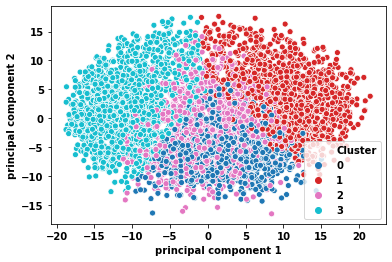

In [94]:
sns.scatterplot(x='principal component 1',y='principal component 2',data=genes_principal_Df,hue='Cluster',palette='tab10')

## Enrichment Analysis

In [95]:
result_genes['cluster'] = genes_pred_y

In [96]:
genes_c0 = result_genes[result_genes['cluster'] == 0]

In [131]:
genes_c0.to_csv('ucec_d4_genes_c0.csv')

In [97]:
genes_c1 = result_genes[result_genes['cluster'] == 1]

In [133]:
genes_c1.to_csv('ucec_d4_genes_c1.csv')

In [98]:
genes_c2 = result_genes[result_genes['cluster'] == 2]

In [135]:
genes_c2.to_csv('ucec_d4_genes_c2.csv')

In [99]:
genes_c3 = result_genes[result_genes['cluster'] == 3]

In [137]:
genes_c3.to_csv('ucec_d4_genes_c3.csv')

#### In this step we need to upload the clusters files to Uniprot website to download GO terms data

#### After dowloading the files, we need to save them as csv after editing the index column name to Transcript

### Biological Process

In [145]:
cluster0 = pd.read_csv('uniprot_d4_ucec_c0.csv', index_col='Transcript')

In [146]:
bio_process_terms_inc0 = cluster0['Gene ontology (biological process)']
bio_process_terms_inc0

Transcript
ENSG00000008517    cell adhesion [GO:0007155]; cytokine-mediated ...
ENSG00000070081    negative regulation of appetite [GO:0032099]; ...
ENSG00000129451                              cell cycle [GO:0007049]
ENSG00000198888    aerobic respiration [GO:0009060]; mitochondria...
ENSG00000181649    apoptotic process [GO:0006915]; placenta devel...
                                         ...                        
ENSG00000145247                   response to bacterium [GO:0009617]
ENSG00000211660    complement activation [GO:0006956]; complement...
ENSG00000099991    cell surface receptor signaling pathway [GO:00...
ENSG00000102265    aging [GO:0007568]; cartilage development [GO:...
ENSG00000133313    glutathione biosynthetic process [GO:0006750];...
Name: Gene ontology (biological process), Length: 1209, dtype: object

In [147]:
bio_process_list_c0 = []
for i in range(len(bio_process_terms_inc0)):
    bio_process_list_c0.extend(str(bio_process_terms_inc0[i]).split('; '))

In [148]:
bio_process_list_c0 = list(filter(lambda a: a != 'nan', bio_process_list_c0))

In [149]:
print(len(bio_process_list_c0))
bio_process_list_c0 = list(set(bio_process_list_c0))
print(len(bio_process_list_c0))

13358
4435


In [150]:
bio_process_terms_c0_dic = {}
for i in range(len(bio_process_list_c0)):
    inc0 = cluster0['Gene ontology (biological process)'].apply(lambda x : 1
            if str(bio_process_list_c0[i]) in str(x) else 0)
    bio_process_terms_c0_dic[str(bio_process_list_c0[i])] = inc0.sum()

In [159]:
cluster1 = pd.read_csv('uniprot_d4_ucec_c1.csv', index_col='Transcript')

In [160]:
bio_process_terms_inc1 = cluster1['Gene ontology (biological process)']
bio_process_terms_inc1

Transcript
ENSG00000198242    nuclear-transcribed mRNA catabolic process, no...
ENSG00000167700                                                  NaN
ENSG00000130204    ion transport [GO:0006811]; macroautophagy [GO...
ENSG00000164182    cellular respiration [GO:0045333]; mitochondri...
ENSG00000179632    negative regulation of transcription by RNA po...
                                         ...                        
ENSG00000172590    mitochondrial translational elongation [GO:007...
ENSG00000205138    mitochondrial respiratory chain complex II ass...
ENSG00000172336    RNA phosphodiester bond hydrolysis, endonucleo...
ENSG00000178449    mitochondrial cytochrome c oxidase assembly [G...
ENSG00000071889    antifungal humoral response [GO:0019732]; anti...
Name: Gene ontology (biological process), Length: 1308, dtype: object

In [161]:
bio_process_list_c1 = []
for i in range(len(bio_process_terms_inc1)):
    bio_process_list_c1.extend(str(bio_process_terms_inc1[i]).split('; '))

In [162]:
bio_process_list_c1 = list(filter(lambda a: a != 'nan', bio_process_list_c1))

In [163]:
print(len(bio_process_list_c1))
bio_process_list_c1 = list(set(bio_process_list_c1))
print(len(bio_process_list_c1))

9182
3409


In [164]:
bio_process_terms_c1_dic = {}
for i in range(len(bio_process_list_c1)):
    inc1 = cluster1['Gene ontology (biological process)'].apply(lambda x : 1
            if str(bio_process_list_c1[i]) in str(x) else 0)
    bio_process_terms_c1_dic[str(bio_process_list_c1[i])] = inc1.sum()

In [165]:
cluster2 = pd.read_csv('uniprot_d4_ucec_c2.csv', index_col='Transcript')

In [166]:
bio_process_terms_inc2 = cluster2['Gene ontology (biological process)']
bio_process_terms_inc2

Transcript
ENSG00000146083                                                  NaN
ENSG00000179262    nucleotide-excision repair [GO:0006289]; posit...
ENSG00000064601    glycosphingolipid metabolic process [GO:000668...
ENSG00000169992    cell-cell adhesion [GO:0098609]; cell-cell jun...
ENSG00000159479    protein ubiquitination [GO:0016567]; regulatio...
                                         ...                        
ENSG00000132004    post-translational protein modification [GO:00...
ENSG00000171867    activation of protein kinase activity [GO:0032...
ENSG00000178209    hemidesmosome assembly [GO:0031581]; intermedi...
ENSG00000103266    cellular response to heat [GO:0034605]; cellul...
ENSG00000105063    COPII vesicle coating [GO:0048208]; regulation...
Name: Gene ontology (biological process), Length: 1219, dtype: object

In [167]:
bio_process_list_c2 = []
for i in range(len(bio_process_terms_inc2)):
    bio_process_list_c2.extend(str(bio_process_terms_inc2[i]).split('; '))

In [168]:
bio_process_list_c2 = list(filter(lambda a: a != 'nan', bio_process_list_c2))

In [169]:
print(len(bio_process_list_c2))
bio_process_list_c2 = list(set(bio_process_list_c2))
print(len(bio_process_list_c2))

12440
4378


In [170]:
bio_process_terms_c2_dic = {}
for i in range(len(bio_process_list_c2)):
    inc2 = cluster2['Gene ontology (biological process)'].apply(lambda x : 1
            if str(bio_process_list_c2[i]) in str(x) else 0)
    bio_process_terms_c2_dic[str(bio_process_list_c2[i])] = inc2.sum()

In [228]:
cluster3 = pd.read_csv('uniprot_d4_ucec_c3.csv', index_col='Transcript')

In [229]:
bio_process_terms_inc3 = cluster3['Gene ontology (biological process)']
bio_process_terms_inc3

Transcript
ENSG00000134108    anterograde axonal transport [GO:0008089]; cel...
ENSG00000070087    actin cytoskeleton organization [GO:0030036]; ...
ENSG00000153561    proteasome-mediated ubiquitin-dependent protei...
ENSG00000166913    cytoplasmic sequestering of protein [GO:005122...
ENSG00000118363    protein targeting to ER [GO:0045047]; signal p...
                                         ...                        
ENSG00000111144    cellular lipid metabolic process [GO:0044255];...
ENSG00000196586    actin filament-based movement [GO:0030048]; ac...
ENSG00000110330    cell surface receptor signaling pathway [GO:00...
ENSG00000105968    chromatin organization [GO:0006325]; chromatin...
ENSG00000066044    3'-UTR-mediated mRNA stabilization [GO:0070935...
Name: Gene ontology (biological process), Length: 1559, dtype: object

In [230]:
bio_process_list_c3 = []
for i in range(len(bio_process_terms_inc3)):
    bio_process_list_c3.extend(str(bio_process_terms_inc3[i]).split('; '))

In [231]:
bio_process_list_c3 = list(filter(lambda a: a != 'nan', bio_process_list_c3))

In [232]:
print(len(bio_process_list_c3))
bio_process_list_c3 = list(set(bio_process_list_c3))
print(len(bio_process_list_c3))

13180
4236


In [233]:
bio_process_terms_c3_dic = {}
for i in range(len(bio_process_list_c3)):
    inc3 = cluster3['Gene ontology (biological process)'].apply(lambda x : 1
            if str(bio_process_list_c3[i]) in str(x) else 0)
    bio_process_terms_c3_dic[str(bio_process_list_c3[i])] = inc3.sum()

### Cluster 0

In [234]:
trunk_bio_process_dic_c0 = {}

for i in range(len(bio_process_list_c0)):
    inct0 = cluster0['Gene ontology (biological process)'].apply(lambda x : 1
            if str(bio_process_list_c0[i]) in str(x) else 0)
    inct1 = cluster1['Gene ontology (biological process)'].apply(lambda x : 1
            if str(bio_process_list_c0[i]) in str(x) else 0)
    inct2 = cluster2['Gene ontology (biological process)'].apply(lambda x : 1
            if str(bio_process_list_c0[i]) in str(x) else 0)
    inct3 = cluster3['Gene ontology (biological process)'].apply(lambda x : 1
            if str(bio_process_list_c0[i]) in str(x) else 0)
    trunk_bio_process_dic_c0[bio_process_list_c0[i]] = inct0.sum() + inct1.sum() + inct2.sum() + inct3.sum()

In [235]:
cluster0_bioProcess_df = pd.DataFrame([trunk_bio_process_dic_c0, bio_process_terms_c0_dic]).T

In [236]:
cluster0_bioProcess_df.columns = ['Ref (5283)', 'C0 (1205)']

In [237]:
cluster0_bioProcess_df.index = cluster0_bioProcess_df.index.set_names(['GO_Term_(biological process)'])

In [238]:
cluster0_bioProcess_df['Expected'] = (cluster0_bioProcess_df['Ref (5283)']/ 5283) * 1205

In [239]:
cluster0_bioProcess_df['Fold_Enrichment'] = cluster0_bioProcess_df['C0 (1205)'] / cluster0_bioProcess_df['Expected']

In [240]:
cluster0_bioProcess_df['+/-'] = cluster0_bioProcess_df.apply(lambda x: '+' if x['Fold_Enrichment']>=1 else '-',axis=1)

In [241]:
import scipy.stats as stats

cluster0_bioProcess_df['P value'] = cluster0_bioProcess_df.apply(lambda x: stats.fisher_exact([[x['C0 (1205)'], (1205 - x['C0 (1205)'])],[(x['Ref (5283)'] - x['C0 (1205)']), (5283 - (1205 + x['Ref (5283)']))]], alternative='two-sided')[1], axis=1)


In [242]:
import statsmodels.stats.multitest as smt

adjusted = smt.multipletests(cluster0_bioProcess_df['P value'], method='fdr_bh')
cluster0_bioProcess_df['Adjusted P value'] = adjusted[1]

In [243]:
cluster0_bioProcess_df

,Ref (5283),C0 (1205),Expected,Fold_Enrichment,+/-,P value,Adjusted P value
GO_Term_(biological process),,,,,,,
adenohypophysis development [GO:0021984],1,1,0.228090,4.384232,+,0.228133,0.442595
negative regulation of keratinocyte differentiation [GO:0045617],3,2,0.684270,2.922822,+,0.132379,0.442595
glial cell-neuron signaling [GO:0150098],1,1,0.228090,4.384232,+,0.228133,0.442595
negative regulation of sodium:proton antiporter activity [GO:0032416],1,1,0.228090,4.384232,+,0.228133,0.442595
negative regulation of neuroblast proliferation [GO:0007406],3,2,0.684270,2.922822,+,0.132379,0.442595
...,...,...,...,...,...,...,...
antigen processing and presentation of peptide antigen via MHC class I [GO:0002474],16,9,3.649442,2.466131,+,0.003880,0.110294
regulation of glomerular filtration [GO:0003093],1,1,0.228090,4.384232,+,0.228133,0.442595
protein maturation by protein folding [GO:0022417],6,1,1.368541,0.730705,-,1.000000,1.000000


In [244]:
cluster0_bioProcess_df.to_csv('UCEC_d4_EnrichmentAnalysis_C0_biologicalProcess.csv')

In [245]:
cluster0_bioProcess_df[cluster0_bioProcess_df['+/-'] == '+'].sort_values('P value')

,Ref (5283),C0 (1205),Expected,Fold_Enrichment,+/-,P value,Adjusted P value
GO_Term_(biological process),,,,,,,
"complement activation, classical pathway [GO:0006958]",48,46,10.948325,4.201556,+,1.563192e-27,6.932756e-24
immune response [GO:0006955],91,68,20.756199,3.276130,+,9.019616e-26,2.000100e-22
complement activation [GO:0006956],35,35,7.983154,4.384232,+,2.934873e-23,4.338720e-20
regulation of complement activation [GO:0030449],41,38,9.351694,4.063435,+,1.722828e-21,1.910186e-18
regulation of immune response [GO:0050776],53,43,12.088775,3.557019,+,3.280549e-19,2.909847e-16
...,...,...,...,...,...,...,...
regulation of myeloid cell differentiation [GO:0045637],4,1,0.912360,1.096058,+,1.000000e+00,1.000000e+00
antifungal humoral response [GO:0019732],4,1,0.912360,1.096058,+,1.000000e+00,1.000000e+00
respiratory electron transport chain [GO:0022904],8,2,1.824721,1.096058,+,1.000000e+00,1.000000e+00


### Cluster 1

In [246]:
trunk_bio_process_dic_c1 = {}

for i in range(len(bio_process_list_c1)):
    inct0 = cluster0['Gene ontology (biological process)'].apply(lambda x : 1
            if str(bio_process_list_c1[i]) in str(x) else 0)
    inct1 = cluster1['Gene ontology (biological process)'].apply(lambda x : 1
            if str(bio_process_list_c1[i]) in str(x) else 0)
    inct2 = cluster2['Gene ontology (biological process)'].apply(lambda x : 1
            if str(bio_process_list_c1[i]) in str(x) else 0)
    inct3 = cluster3['Gene ontology (biological process)'].apply(lambda x : 1
            if str(bio_process_list_c1[i]) in str(x) else 0)
    trunk_bio_process_dic_c1[bio_process_list_c1[i]] = inct0.sum() + inct1.sum() + inct2.sum() + inct3.sum()

In [247]:
cluster1_bioProcess_df = pd.DataFrame([trunk_bio_process_dic_c1, bio_process_terms_c1_dic]).T

In [248]:
cluster1_bioProcess_df.columns = ['Ref (5283)', 'C1 (1303)']

In [249]:
cluster1_bioProcess_df.index = cluster1_bioProcess_df.index.set_names(['GO_Term_(biological process)'])

In [250]:
cluster1_bioProcess_df['Expected'] = (cluster1_bioProcess_df['Ref (5283)']/ 5283) * 1303

In [251]:
cluster1_bioProcess_df['Fold_Enrichment'] = cluster1_bioProcess_df['C1 (1303)'] / cluster1_bioProcess_df['Expected']

In [252]:
cluster1_bioProcess_df['+/-'] = cluster1_bioProcess_df.apply(lambda x: '+' if x['Fold_Enrichment']>=1 else '-',axis=1)

In [253]:
cluster1_bioProcess_df['P value'] = cluster1_bioProcess_df.apply(lambda x: stats.fisher_exact([[x['C1 (1303)'], (1303 - x['C1 (1303)'])],[(x['Ref (5283)'] - x['C1 (1303)']), (5283 - (1303 + x['Ref (5283)']))]], alternative='two-sided')[1], axis=1)


In [254]:
adjusted = smt.multipletests(cluster1_bioProcess_df['P value'], method='fdr_bh')
cluster1_bioProcess_df['Adjusted P value'] = adjusted[1]

In [255]:
cluster1_bioProcess_df

,Ref (5283),C1 (1303),Expected,Fold_Enrichment,+/-,P value,Adjusted P value
GO_Term_(biological process),,,,,,,
positive regulation of canonical Wnt signaling pathway [GO:0090263],76,17,18.744653,0.906925,-,0.689723,0.917388
regulation of multivesicular body size involved in endosome transport [GO:0010797],1,1,0.246640,4.054490,+,0.246687,0.699767
microtubule nucleation by interphase microtubule organizing center [GO:0051415],2,1,0.493280,2.027245,+,0.432555,0.812888
positive regulation of interleukin-2 production [GO:0032743],10,2,2.466402,0.810898,-,1.000000,1.000000
coenzyme A biosynthetic process [GO:0015937],4,1,0.986561,1.013622,+,1.000000,1.000000
...,...,...,...,...,...,...,...
antigen processing and presentation of peptide antigen via MHC class I [GO:0002474],16,2,3.946243,0.506811,-,0.385769,0.812888
positive regulation of L-dopa biosynthetic process [GO:1903197],1,1,0.246640,4.054490,+,0.246687,0.699767
protein maturation by protein folding [GO:0022417],6,3,1.479841,2.027245,+,0.164260,0.699767


In [256]:
cluster1_bioProcess_df.to_csv('UCEC_d4_EnrichmentAnalysis_C1_biologicalProcess.csv')

In [257]:
cluster1_bioProcess_df[cluster1_bioProcess_df['+/-'] == '+'].sort_values('P value')

,Ref (5283),C1 (1303),Expected,Fold_Enrichment,+/-,P value,Adjusted P value
GO_Term_(biological process),,,,,,,
SRP-dependent cotranslational protein targeting to membrane [GO:0006614],88,73,21.704335,3.363383,+,1.359932e-30,4.136581e-27
translation [GO:0006412],134,96,33.049782,2.904709,+,2.426859e-30,4.136581e-27
viral transcription [GO:0019083],93,74,22.937535,3.226153,+,1.017111e-28,1.155777e-25
"nuclear-transcribed mRNA catabolic process, nonsense-mediated decay [GO:0000184]",101,77,24.910657,3.091047,+,1.378951e-27,1.175211e-24
translational initiation [GO:0006413],108,80,26.637138,3.003326,+,3.901058e-27,2.659741e-24
...,...,...,...,...,...,...,...
response to radiation [GO:0009314],8,2,1.973121,1.013622,+,1.000000e+00,1.000000e+00
positive regulation of cholesterol efflux [GO:0010875],8,2,1.973121,1.013622,+,1.000000e+00,1.000000e+00
negative regulation of macrophage derived foam cell differentiation [GO:0010745],4,1,0.986561,1.013622,+,1.000000e+00,1.000000e+00


### Cluster 2

In [258]:
trunk_bio_process_dic_c2 = {}

for i in range(len(bio_process_list_c2)):
    inct0 = cluster0['Gene ontology (biological process)'].apply(lambda x : 1
            if str(bio_process_list_c2[i]) in str(x) else 0)
    inct1 = cluster1['Gene ontology (biological process)'].apply(lambda x : 1
            if str(bio_process_list_c2[i]) in str(x) else 0)
    inct2 = cluster2['Gene ontology (biological process)'].apply(lambda x : 1
            if str(bio_process_list_c2[i]) in str(x) else 0)
    inct3 = cluster3['Gene ontology (biological process)'].apply(lambda x : 1
            if str(bio_process_list_c2[i]) in str(x) else 0)
    trunk_bio_process_dic_c2[bio_process_list_c2[i]] = inct0.sum() + inct1.sum() + inct2.sum() + inct3.sum()

In [259]:
cluster2_bioProcess_df = pd.DataFrame([trunk_bio_process_dic_c2, bio_process_terms_c2_dic]).T

In [260]:
cluster2_bioProcess_df.columns = ['Ref (5283)', 'C2 (1218)']

In [261]:
cluster2_bioProcess_df.index = cluster2_bioProcess_df.index.set_names(['GO_Term_(biological process)'])

In [262]:
cluster2_bioProcess_df['Expected'] = (cluster2_bioProcess_df['Ref (5283)']/ 5283) * 1218

In [263]:
cluster2_bioProcess_df['Fold_Enrichment'] = cluster2_bioProcess_df['C2 (1218)'] / cluster2_bioProcess_df['Expected']

In [264]:
cluster2_bioProcess_df['+/-'] = cluster2_bioProcess_df.apply(lambda x: '+' if x['Fold_Enrichment']>=1 else '-',axis=1)

In [265]:
cluster2_bioProcess_df['P value'] = cluster2_bioProcess_df.apply(lambda x: stats.fisher_exact([[x['C2 (1218)'], (1218 - x['C2 (1218)'])],[(x['Ref (5283)'] - x['C2 (1218)']), (5283 - (1218 + x['Ref (5283)']))]], alternative='two-sided')[1], axis=1)


In [266]:
adjusted = smt.multipletests(cluster2_bioProcess_df['P value'], method='fdr_bh')
cluster2_bioProcess_df['Adjusted P value'] = adjusted[1]

In [267]:
cluster2_bioProcess_df

,Ref (5283),C2 (1218),Expected,Fold_Enrichment,+/-,P value,Adjusted P value
GO_Term_(biological process),,,,,,,
negative regulation of neuroblast proliferation [GO:0007406],3,1,0.691652,1.445813,+,0.544601,0.757631
pre-miRNA export from nucleus [GO:0035281],2,2,0.461102,4.337438,+,0.053160,0.571331
positive regulation of canonical Wnt signaling pathway [GO:0090263],76,21,17.521863,1.198503,+,0.339768,0.679771
positive regulation of natural killer cell mediated cytotoxicity directed against tumor cell target [GO:0002860],2,2,0.461102,4.337438,+,0.053160,0.571331
synaptic vesicle recycling [GO:0036465],2,1,0.461102,2.168719,+,0.408049,0.679771
...,...,...,...,...,...,...,...
antigen processing and presentation of peptide antigen via MHC class I [GO:0002474],16,2,3.688813,0.542180,-,0.550576,0.763759
pulmonary valve morphogenesis [GO:0003184],4,1,0.922203,1.084360,+,1.000000,1.000000
developmental cell growth [GO:0048588],2,2,0.461102,4.337438,+,0.053160,0.571331


In [268]:
cluster2_bioProcess_df.to_csv('UCEC_d4_EnrichmentAnalysis_C2_biologicalProcess.csv')

In [269]:
cluster2_bioProcess_df[cluster2_bioProcess_df['+/-'] == '+'].sort_values('P value')

,Ref (5283),C2 (1218),Expected,Fold_Enrichment,+/-,P value,Adjusted P value
GO_Term_(biological process),,,,,,,
axon guidance [GO:0007411],59,33,13.602499,2.426025,+,5.061162e-08,0.000111
in utero embryonic development [GO:0001701],61,30,14.063600,2.133166,+,9.167778e-06,0.010034
positive regulation of DNA-binding transcription factor activity [GO:0051091],37,20,8.530380,2.344561,+,4.308935e-05,0.031441
cytoskeleton-dependent intracellular transport [GO:0030705],9,8,2.074957,3.855501,+,5.685171e-05,0.035557
cell adhesion [GO:0007155],122,48,28.127200,1.706533,+,7.535157e-05,0.036654
...,...,...,...,...,...,...,...
positive regulation of vesicle fusion [GO:0031340],4,1,0.922203,1.084360,+,1.000000e+00,1.000000
somite development [GO:0061053],4,1,0.922203,1.084360,+,1.000000e+00,1.000000
AMP biosynthetic process [GO:0006167],4,1,0.922203,1.084360,+,1.000000e+00,1.000000


### Cluster 3

In [270]:
trunk_bio_process_dic_c3 = {}

for i in range(len(bio_process_list_c3)):
    inct0 = cluster0['Gene ontology (biological process)'].apply(lambda x : 1
            if str(bio_process_list_c3[i]) in str(x) else 0)
    inct1 = cluster1['Gene ontology (biological process)'].apply(lambda x : 1
            if str(bio_process_list_c3[i]) in str(x) else 0)
    inct2 = cluster2['Gene ontology (biological process)'].apply(lambda x : 1
            if str(bio_process_list_c3[i]) in str(x) else 0)
    inct3 = cluster3['Gene ontology (biological process)'].apply(lambda x : 1
            if str(bio_process_list_c3[i]) in str(x) else 0)
    trunk_bio_process_dic_c3[bio_process_list_c3[i]] = inct0.sum() + inct1.sum() + inct2.sum() + inct3.sum()

In [271]:
cluster3_bioProcess_df = pd.DataFrame([trunk_bio_process_dic_c3, bio_process_terms_c3_dic]).T

In [272]:
cluster3_bioProcess_df.columns = ['Ref (5283)', 'C3 (1557)']

In [273]:
cluster3_bioProcess_df.index = cluster3_bioProcess_df.index.set_names(['GO_Term_(biological process)'])

In [274]:
cluster3_bioProcess_df['Expected'] = (cluster3_bioProcess_df['Ref (5283)']/ 5283) * 1557

In [275]:
cluster3_bioProcess_df['Fold_Enrichment'] = cluster3_bioProcess_df['C3 (1557)'] / cluster3_bioProcess_df['Expected']

In [276]:
cluster3_bioProcess_df['+/-'] = cluster3_bioProcess_df.apply(lambda x: '+' if x['Fold_Enrichment']>=1 else '-',axis=1)

In [277]:
cluster3_bioProcess_df['P value'] = cluster3_bioProcess_df.apply(lambda x: stats.fisher_exact([[x['C3 (1557)'], (1557 - x['C3 (1557)'])],[(x['Ref (5283)'] - x['C3 (1557)']), (5283 - (1557 + x['Ref (5283)']))]], alternative='two-sided')[1], axis=1)


In [278]:
adjusted = smt.multipletests(cluster3_bioProcess_df['P value'], method='fdr_bh')
cluster3_bioProcess_df['Adjusted P value'] = adjusted[1]

In [279]:
cluster3_bioProcess_df

,Ref (5283),C3 (1557),Expected,Fold_Enrichment,+/-,P value,Adjusted P value
GO_Term_(biological process),,,,,,,
negative regulation of keratinocyte differentiation [GO:0045617],3,1,0.884157,1.131021,+,1.000000,1.000000
regulation of pentose-phosphate shunt [GO:0043456],1,1,0.294719,3.393064,+,0.294775,0.749774
positive regulation of canonical Wnt signaling pathway [GO:0090263],76,23,22.398637,1.026848,+,0.899598,1.000000
microtubule nucleation by interphase microtubule organizing center [GO:0051415],2,1,0.589438,1.696532,+,0.502697,0.846353
synaptic vesicle recycling [GO:0036465],2,1,0.589438,1.696532,+,0.502697,0.846353
...,...,...,...,...,...,...,...
antigen processing and presentation of peptide antigen via MHC class I [GO:0002474],16,3,4.715503,0.636199,-,0.422790,0.846353
"nucleotide-excision repair, preincision complex stabilization [GO:0006293]",9,5,2.652470,1.885035,+,0.135515,0.749774
"positive regulation of protein localization to chromosome, telomeric region [GO:1904816]",2,1,0.589438,1.696532,+,0.502697,0.846353


In [280]:
cluster3_bioProcess_df.to_csv('UCEC_d4_EnrichmentAnalysis_C3_biologicalProcess.csv')

In [281]:
cluster3_bioProcess_df[cluster3_bioProcess_df['+/-'] == '+'].sort_values('P value')

,Ref (5283),C3 (1557),Expected,Fold_Enrichment,+/-,P value,Adjusted P value
GO_Term_(biological process),,,,,,,
"mRNA splicing, via spliceosome [GO:0000398]",181,90,53.344123,1.687159,+,1.894409e-08,0.000080
RNA splicing [GO:0008380],94,49,27.703578,1.768725,+,5.854204e-06,0.006200
"regulation of alternative mRNA splicing, via spliceosome [GO:0000381]",41,26,12.083475,2.151699,+,7.590386e-06,0.006431
"regulation of mRNA splicing, via spliceosome [GO:0048024]",12,11,3.536627,3.110308,+,1.274914e-05,0.008470
mRNA processing [GO:0006397],77,41,22.693356,1.806696,+,1.399683e-05,0.008470
...,...,...,...,...,...,...,...
optic nerve development [GO:0021554],3,1,0.884157,1.131021,+,1.000000e+00,1.000000
negative regulation of oxidative stress-induced neuron death [GO:1903204],3,1,0.884157,1.131021,+,1.000000e+00,1.000000
positive regulation of viral transcription [GO:0050434],23,7,6.778535,1.032672,+,1.000000e+00,1.000000


## Cellular Component

In [282]:
cell_comp_terms_inc0 = cluster0['Gene ontology (cellular component)']
cell_comp_terms_inc0

Transcript
ENSG00000008517    cytosol [GO:0005829]; extracellular space [GO:...
ENSG00000070081    cytosol [GO:0005829]; endoplasmic reticulum [G...
ENSG00000129451    extracellular region [GO:0005576]; secretory g...
ENSG00000198888    dendrite [GO:0030425]; integral component of m...
ENSG00000181649        cytoplasm [GO:0005737]; membrane [GO:0016020]
                                         ...                        
ENSG00000145247                                endosome [GO:0005768]
ENSG00000211660    extracellular region [GO:0005576]; extracellul...
ENSG00000099991    aggresome [GO:0016235]; cytosol [GO:0005829]; ...
ENSG00000102265    basement membrane [GO:0005604]; endoplasmic re...
ENSG00000133313    cytosol [GO:0005829]; extracellular exosome [G...
Name: Gene ontology (cellular component), Length: 1209, dtype: object

In [283]:
cell_comp_list_c0 = []
for i in range(len(cell_comp_terms_inc0)):
    cell_comp_list_c0.extend(str(cell_comp_terms_inc0[i]).split('; '))

In [284]:
cell_comp_list_c0 = list(filter(lambda a: a != 'nan', cell_comp_list_c0))

In [285]:
print(len(cell_comp_list_c0))
cell_comp_list_c0 = list(set(cell_comp_list_c0))
print(len(cell_comp_list_c0))

6724
641


In [286]:
cell_comp_terms_c0_dic = {}
for i in range(len(cell_comp_list_c0)):
    inc0 = cluster0['Gene ontology (cellular component)'].apply(lambda x : 1
            if str(cell_comp_list_c0[i]) in str(x) else 0)
    cell_comp_terms_c0_dic[str(cell_comp_list_c0[i])] = inc0.sum()

In [287]:
cell_comp_terms_inc1 = cluster1['Gene ontology (cellular component)']
cell_comp_terms_inc1

Transcript
ENSG00000198242    cytoplasm [GO:0005737]; cytosol [GO:0005829]; ...
ENSG00000167700          integral component of membrane [GO:0016021]
ENSG00000130204    cytosol [GO:0005829]; integral component of me...
ENSG00000164182    mitochondrial inner membrane [GO:0005743]; mit...
ENSG00000179632    axon [GO:0030424]; cytoplasm [GO:0005737]; cyt...
                                         ...                        
ENSG00000172590    mitochondrial inner membrane [GO:0005743]; mit...
ENSG00000205138    mitochondrial matrix [GO:0005759]; mitochondri...
ENSG00000172336    cytoplasm [GO:0005737]; multimeric ribonucleas...
ENSG00000178449    integral component of membrane [GO:0016021]; m...
ENSG00000071889                     extracellular space [GO:0005615]
Name: Gene ontology (cellular component), Length: 1308, dtype: object

In [288]:
cell_comp_list_c1 = []
for i in range(len(cell_comp_terms_inc1)):
    cell_comp_list_c1.extend(str(cell_comp_terms_inc1[i]).split('; '))

In [289]:
cell_comp_list_c1 = list(filter(lambda a: a != 'nan', cell_comp_list_c1))

In [290]:
print(len(cell_comp_list_c1))
cell_comp_list_c1 = list(set(cell_comp_list_c1))
print(len(cell_comp_list_c1))

6507
734


In [291]:
cell_comp_terms_c1_dic = {}
for i in range(len(cell_comp_list_c1)):
    inc1 = cluster1['Gene ontology (cellular component)'].apply(lambda x : 1
            if str(cell_comp_list_c1[i]) in str(x) else 0)
    cell_comp_terms_c1_dic[str(cell_comp_list_c1[i])] = inc1.sum()

In [292]:
cell_comp_terms_inc2 = cluster2['Gene ontology (cellular component)']
cell_comp_terms_inc2

Transcript
ENSG00000146083                                                  NaN
ENSG00000179262    centriolar satellite [GO:0034451]; cytoplasm [...
ENSG00000064601    azurophil granule lumen [GO:0035578]; endoplas...
ENSG00000169992    cell projection [GO:0042995]; cell surface [GO...
ENSG00000159479    core mediator complex [GO:0070847]; mediator c...
                                         ...                        
ENSG00000132004    cytosol [GO:0005829]; preribosome, large subun...
ENSG00000171867    anchored component of external side of plasma ...
ENSG00000178209    brush border [GO:0005903]; costamere [GO:00430...
ENSG00000103266    chaperone complex [GO:0101031]; cytoplasm [GO:...
ENSG00000105063    cytosol [GO:0005829]; Golgi membrane [GO:00001...
Name: Gene ontology (cellular component), Length: 1219, dtype: object

In [293]:
cell_comp_list_c2 = []
for i in range(len(cell_comp_terms_inc2)):
    cell_comp_list_c2.extend(str(cell_comp_terms_inc2[i]).split('; '))

In [294]:
cell_comp_list_c2 = list(filter(lambda a: a != 'nan', cell_comp_list_c2))

In [295]:
print(len(cell_comp_list_c2))
cell_comp_list_c2 = list(set(cell_comp_list_c2))
print(len(cell_comp_list_c2))

7547
817


In [296]:
cell_comp_terms_c2_dic = {}
for i in range(len(cell_comp_list_c2)):
    inc2 = cluster2['Gene ontology (cellular component)'].apply(lambda x : 1
            if str(cell_comp_list_c2[i]) in str(x) else 0)
    cell_comp_terms_c2_dic[str(cell_comp_list_c2[i])] = inc2.sum()

In [297]:
cell_comp_terms_inc3 = cluster3['Gene ontology (cellular component)']
cell_comp_terms_inc3

Transcript
ENSG00000134108    axon cytoplasm [GO:1904115]; cytoplasm [GO:000...
ENSG00000070087    cytoplasm [GO:0005737]; cytoskeleton [GO:00058...
ENSG00000153561    cytoplasm [GO:0005737]; GID complex [GO:003465...
ENSG00000166913    cytoplasm [GO:0005737]; cytosol [GO:0005829]; ...
ENSG00000118363    endoplasmic reticulum membrane [GO:0005789]; i...
                                         ...                        
ENSG00000111144    cytosol [GO:0005829]; extracellular exosome [G...
ENSG00000196586    actin cytoskeleton [GO:0015629]; actin filamen...
ENSG00000110330    CD40 receptor complex [GO:0035631]; cytoplasm ...
ENSG00000105968    extracellular exosome [GO:0070062]; nuclear ch...
ENSG00000066044    cytoplasm [GO:0005737]; cytoplasmic stress gra...
Name: Gene ontology (cellular component), Length: 1559, dtype: object

In [298]:
cell_comp_list_c3 = []
for i in range(len(cell_comp_terms_inc3)):
    cell_comp_list_c3.extend(str(cell_comp_terms_inc3[i]).split('; '))

In [299]:
cell_comp_list_c3 = list(filter(lambda a: a != 'nan', cell_comp_list_c3))

In [300]:
print(len(cell_comp_list_c3))
cell_comp_list_c3 = list(set(cell_comp_list_c3))
print(len(cell_comp_list_c3))

9147
882


In [301]:
cell_comp_terms_c3_dic = {}
for i in range(len(cell_comp_list_c3)):
    inc3 = cluster3['Gene ontology (cellular component)'].apply(lambda x : 1
            if str(cell_comp_list_c3[i]) in str(x) else 0)
    cell_comp_terms_c3_dic[str(cell_comp_list_c3[i])] = inc3.sum()

### Cluster 0

In [302]:
trunk_cell_comp_dic_c0 = {}

for i in range(len(cell_comp_list_c0)):
    inct0 = cluster0['Gene ontology (cellular component)'].apply(lambda x : 1
            if str(cell_comp_list_c0[i]) in str(x) else 0)
    inct1 = cluster1['Gene ontology (cellular component)'].apply(lambda x : 1
            if str(cell_comp_list_c0[i]) in str(x) else 0)
    inct2 = cluster2['Gene ontology (cellular component)'].apply(lambda x : 1
            if str(cell_comp_list_c0[i]) in str(x) else 0)
    inct3 = cluster3['Gene ontology (cellular component)'].apply(lambda x : 1
            if str(cell_comp_list_c0[i]) in str(x) else 0)
    trunk_cell_comp_dic_c0[cell_comp_list_c0[i]] = inct0.sum() + inct1.sum() + inct2.sum() + inct3.sum()

In [303]:
cluster0_cellComp_df = pd.DataFrame([trunk_cell_comp_dic_c0, cell_comp_terms_c0_dic]).T

In [304]:
cluster0_cellComp_df.columns = ['Ref (5283)', 'C0 (1205)']

In [305]:
cluster0_cellComp_df.index = cluster0_cellComp_df.index.set_names(['Gene ontology (cellular component)'])

In [306]:
cluster0_cellComp_df['Expected'] = (cluster0_cellComp_df['Ref (5283)']/ 5283) * 1205

In [307]:
cluster0_cellComp_df['Fold_Enrichment'] = cluster0_cellComp_df['C0 (1205)'] / cluster0_cellComp_df['Expected']

In [308]:
cluster0_cellComp_df['+/-'] = cluster0_cellComp_df.apply(lambda x: '+' if x['Fold_Enrichment']>=1 else '-',axis=1)

In [309]:
cluster0_cellComp_df['P value'] = cluster0_cellComp_df.apply(lambda x: stats.fisher_exact([[x['C0 (1205)'], (1205 - x['C0 (1205)'])],[(x['Ref (5283)'] - x['C0 (1205)']), (5283 - (1205 + x['Ref (5283)']))]], alternative='two-sided')[1], axis=1)


In [310]:
adjusted = smt.multipletests(cluster0_cellComp_df['P value'], method='fdr_bh')
cluster0_cellComp_df['Adjusted P value'] = adjusted[1]

In [311]:
cluster0_cellComp_df

,Ref (5283),C0 (1205),Expected,Fold_Enrichment,+/-,P value,Adjusted P value
Gene ontology (cellular component),,,,,,,
death-inducing signaling complex [GO:0031264],2,1,0.456180,2.192116,+,0.404255,0.657684
NuRD complex [GO:0016581],11,2,2.508991,0.797133,-,1.000000,1.000000
spanning component of plasma membrane [GO:0044214],1,1,0.228090,4.384232,+,0.228133,0.495707
early endosome membrane [GO:0031901],51,17,11.632595,1.461411,+,0.092097,0.409960
RNA polymerase II transcription regulator complex [GO:0090575],24,1,5.474162,0.182676,-,0.026607,0.194272
...,...,...,...,...,...,...,...
Wnt-Frizzled-LRP5/6 complex [GO:1990851],2,1,0.456180,2.192116,+,0.404255,0.657684
protein C inhibitor-coagulation factor XI complex [GO:0097183],1,1,0.228090,4.384232,+,0.228133,0.495707
catenin complex [GO:0016342],6,1,1.368541,0.730705,-,1.000000,1.000000


In [312]:
cluster0_cellComp_df.to_csv('UCEC_d4_EnrichmentAnalysis_C0_cellularComponent.csv')

In [313]:
cluster0_bioProcess_df[cluster0_bioProcess_df['+/-'] == '+'].sort_values('P value')

,Ref (5283),C0 (1205),Expected,Fold_Enrichment,+/-,P value,Adjusted P value
GO_Term_(biological process),,,,,,,
"complement activation, classical pathway [GO:0006958]",48,46,10.948325,4.201556,+,1.563192e-27,6.932756e-24
immune response [GO:0006955],91,68,20.756199,3.276130,+,9.019616e-26,2.000100e-22
complement activation [GO:0006956],35,35,7.983154,4.384232,+,2.934873e-23,4.338720e-20
regulation of complement activation [GO:0030449],41,38,9.351694,4.063435,+,1.722828e-21,1.910186e-18
regulation of immune response [GO:0050776],53,43,12.088775,3.557019,+,3.280549e-19,2.909847e-16
...,...,...,...,...,...,...,...
regulation of myeloid cell differentiation [GO:0045637],4,1,0.912360,1.096058,+,1.000000e+00,1.000000e+00
antifungal humoral response [GO:0019732],4,1,0.912360,1.096058,+,1.000000e+00,1.000000e+00
respiratory electron transport chain [GO:0022904],8,2,1.824721,1.096058,+,1.000000e+00,1.000000e+00


### Cluster 1

In [314]:
trunk_cell_comp_dic_c1 = {}

for i in range(len(cell_comp_list_c1)):
    inct0 = cluster0['Gene ontology (cellular component)'].apply(lambda x : 1
            if str(cell_comp_list_c1[i]) in str(x) else 0)
    inct1 = cluster1['Gene ontology (cellular component)'].apply(lambda x : 1
            if str(cell_comp_list_c1[i]) in str(x) else 0)
    inct2 = cluster2['Gene ontology (cellular component)'].apply(lambda x : 1
            if str(cell_comp_list_c1[i]) in str(x) else 0)
    inct3 = cluster3['Gene ontology (cellular component)'].apply(lambda x : 1
            if str(cell_comp_list_c1[i]) in str(x) else 0)
    trunk_cell_comp_dic_c1[cell_comp_list_c1[i]] = inct0.sum() + inct1.sum() + inct2.sum() + inct3.sum()

In [315]:
cluster1_cellComp_df = pd.DataFrame([trunk_cell_comp_dic_c1, cell_comp_terms_c1_dic]).T

In [316]:
cluster1_cellComp_df.columns = ['Ref (5283)', 'C1 (1303)']

In [317]:
cluster1_cellComp_df.index = cluster1_cellComp_df.index.set_names(['Gene ontology (cellular component)'])

In [318]:
cluster1_cellComp_df['Expected'] = (cluster1_cellComp_df['Ref (5283)']/ 5283) * 1303

In [319]:
cluster1_cellComp_df['Fold_Enrichment'] = cluster1_cellComp_df['C1 (1303)'] / cluster1_cellComp_df['Expected']

In [320]:
cluster1_cellComp_df['+/-'] = cluster1_cellComp_df.apply(lambda x: '+' if x['Fold_Enrichment']>=1 else '-',axis=1)

In [321]:
cluster1_cellComp_df['P value'] = cluster1_cellComp_df.apply(lambda x: stats.fisher_exact([[x['C1 (1303)'], (1303 - x['C1 (1303)'])],[(x['Ref (5283)'] - x['C1 (1303)']), (5283 - (1303 + x['Ref (5283)']))]], alternative='two-sided')[1], axis=1)


In [322]:
adjusted = smt.multipletests(cluster1_cellComp_df['P value'], method='fdr_bh')
cluster1_cellComp_df['Adjusted P value'] = adjusted[1]

In [323]:
cluster1_cellComp_df

,Ref (5283),C1 (1303),Expected,Fold_Enrichment,+/-,P value,Adjusted P value
Gene ontology (cellular component),,,,,,,
RNA polymerase II transcription regulator complex [GO:0090575],24,2,5.919364,0.337874,-,9.254876e-02,4.852199e-01
cytosolic large ribosomal subunit [GO:0022625],54,45,13.318569,3.378741,+,1.686376e-19,6.188999e-17
early endosome membrane [GO:0031901],51,5,12.578648,0.397499,-,1.323561e-02,1.816653e-01
NuRD complex [GO:0016581],11,1,2.713042,0.368590,-,3.128839e-01,6.819396e-01
brush border [GO:0005903],29,5,7.152565,0.699050,-,5.163219e-01,8.347583e-01
...,...,...,...,...,...,...,...
nucleolus [GO:0005730],394,121,97.176226,1.245161,+,1.117115e-02,1.673393e-01
protein-containing complex [GO:0032991],302,54,74.485330,0.724975,-,3.156010e-03,6.103609e-02
lipid tube [GO:0060987],1,1,0.246640,4.054490,+,2.466869e-01,6.026739e-01


In [324]:
cluster1_cellComp_df.to_csv('UCEC_d4_EnrichmentAnalysis_C1_cellularComponent.csv')

In [325]:
cluster1_cellComp_df[cluster1_cellComp_df['+/-'] == '+'].sort_values('P value')

,Ref (5283),C1 (1303),Expected,Fold_Enrichment,+/-,P value,Adjusted P value
Gene ontology (cellular component),,,,,,,
cytosolic large ribosomal subunit [GO:0022625],54,45,13.318569,3.378741,+,1.686376e-19,6.188999e-17
cytosolic small ribosomal subunit [GO:0022627],36,33,8.879046,3.716616,+,2.493183e-17,6.099987e-15
mitochondrial inner membrane [GO:0005743],247,117,60.920121,1.920548,+,1.427414e-14,2.619305e-12
polysomal ribosome [GO:0042788],28,22,6.905925,3.185670,+,3.087423e-09,3.776947e-07
ribosome [GO:0005840],37,26,9.125686,2.849101,+,6.621112e-09,6.074871e-07
...,...,...,...,...,...,...,...
platelet dense granule lumen [GO:0031089],4,1,0.986561,1.013622,+,1.000000e+00,1.000000e+00
HOPS complex [GO:0030897],4,1,0.986561,1.013622,+,1.000000e+00,1.000000e+00
early phagosome [GO:0032009],4,1,0.986561,1.013622,+,1.000000e+00,1.000000e+00


### Cluster 2

In [326]:
trunk_cell_comp_dic_c2 = {}

for i in range(len(cell_comp_list_c2)):
    inct0 = cluster0['Gene ontology (cellular component)'].apply(lambda x : 1
            if str(cell_comp_list_c2[i]) in str(x) else 0)
    inct1 = cluster1['Gene ontology (cellular component)'].apply(lambda x : 1
            if str(cell_comp_list_c2[i]) in str(x) else 0)
    inct2 = cluster2['Gene ontology (cellular component)'].apply(lambda x : 1
            if str(cell_comp_list_c2[i]) in str(x) else 0)
    inct3 = cluster3['Gene ontology (cellular component)'].apply(lambda x : 1
            if str(cell_comp_list_c2[i]) in str(x) else 0)
    trunk_cell_comp_dic_c2[cell_comp_list_c2[i]] = inct0.sum() + inct1.sum() + inct2.sum() + inct3.sum()

In [327]:
cluster2_cellComp_df = pd.DataFrame([trunk_cell_comp_dic_c2, cell_comp_terms_c2_dic]).T

In [328]:
cluster2_cellComp_df.columns = ['Ref (5283)', 'C2 (1218)']

In [329]:
cluster2_cellComp_df.index = cluster2_cellComp_df.index.set_names(['Gene ontology (cellular component)'])

In [330]:
cluster2_cellComp_df['Expected'] = (cluster2_cellComp_df['Ref (5283)']/ 5283) * 1218

In [331]:
cluster2_cellComp_df['Fold_Enrichment'] = cluster2_cellComp_df['C2 (1218)'] / cluster2_cellComp_df['Expected']

In [332]:
cluster2_cellComp_df['+/-'] = cluster2_cellComp_df.apply(lambda x: '+' if x['Fold_Enrichment']>=1 else '-',axis=1)

In [333]:
cluster2_cellComp_df['P value'] = cluster2_cellComp_df.apply(lambda x: stats.fisher_exact([[x['C2 (1218)'], (1218 - x['C2 (1218)'])],[(x['Ref (5283)'] - x['C2 (1218)']), (5283 - (1218 + x['Ref (5283)']))]], alternative='two-sided')[1], axis=1)


In [334]:
adjusted = smt.multipletests(cluster2_cellComp_df['P value'], method='fdr_bh')
cluster2_cellComp_df['Adjusted P value'] = adjusted[1]

In [335]:
cluster2_cellComp_df

,Ref (5283),C2 (1218),Expected,Fold_Enrichment,+/-,P value,Adjusted P value
Gene ontology (cellular component),,,,,,,
histone pre-mRNA 3'end processing complex [GO:0071204],3,1,0.691652,1.445813,+,0.544601,0.771125
RNA polymerase II transcription regulator complex [GO:0090575],24,12,5.533220,2.168719,+,0.005359,0.211434
cytosolic large ribosomal subunit [GO:0022625],54,2,12.449744,0.160646,-,0.000141,0.024473
early endosome membrane [GO:0031901],51,9,11.758092,0.765430,-,0.407565,0.678973
NuRD complex [GO:0016581],11,5,2.536059,1.971563,+,0.141537,0.579679
...,...,...,...,...,...,...,...
protein-containing complex [GO:0032991],302,88,69.626349,1.263889,+,0.020692,0.385569
pericentric heterochromatin [GO:0005721],4,1,0.922203,1.084360,+,1.000000,1.000000
Lewy body [GO:0097413],1,1,0.230551,4.337438,+,0.230594,0.579679


In [336]:
cluster2_cellComp_df.to_csv('UCEC_d4_EnrichmentAnalysis_C2_cellularComponent.csv')

In [337]:
cluster2_cellComp_df[cluster2_cellComp_df['+/-'] == '+'].sort_values('P value')

,Ref (5283),C2 (1218),Expected,Fold_Enrichment,+/-,P value,Adjusted P value
Gene ontology (cellular component),,,,,,,
microtubule cytoskeleton [GO:0015630],64,31,14.755253,2.100947,+,0.000009,0.003521
CMG complex [GO:0071162],6,6,1.383305,4.337438,+,0.000150,0.024473
MCM complex [GO:0042555],6,6,1.383305,4.337438,+,0.000150,0.024473
"nuclear chromosome, telomeric region [GO:0000784]",42,20,9.683135,2.065447,+,0.000622,0.077222
axonal growth cone [GO:0044295],11,8,2.536059,3.154501,+,0.000662,0.077222
...,...,...,...,...,...,...,...
telomerase holoenzyme complex [GO:0005697],13,3,2.997161,1.000947,+,1.000000,1.000000
clathrin coat [GO:0030118],4,1,0.922203,1.084360,+,1.000000,1.000000
"proton-transporting V-type ATPase, V1 domain [GO:0033180]",4,1,0.922203,1.084360,+,1.000000,1.000000


### Cluster 3

In [338]:
trunk_cell_comp_dic_c3 = {}

for i in range(len(cell_comp_list_c3)):
    inct0 = cluster0['Gene ontology (cellular component)'].apply(lambda x : 1
            if str(cell_comp_list_c3[i]) in str(x) else 0)
    inct1 = cluster1['Gene ontology (cellular component)'].apply(lambda x : 1
            if str(cell_comp_list_c3[i]) in str(x) else 0)
    inct2 = cluster2['Gene ontology (cellular component)'].apply(lambda x : 1
            if str(cell_comp_list_c3[i]) in str(x) else 0)
    inct3 = cluster3['Gene ontology (cellular component)'].apply(lambda x : 1
            if str(cell_comp_list_c3[i]) in str(x) else 0)
    trunk_cell_comp_dic_c3[cell_comp_list_c3[i]] = inct0.sum() + inct1.sum() + inct2.sum() + inct3.sum()

In [339]:
cluster3_cellComp_df = pd.DataFrame([trunk_cell_comp_dic_c3, cell_comp_terms_c3_dic]).T

In [340]:
cluster3_cellComp_df.columns = ['Ref (5283)', 'C3 (1557)']

In [341]:
cluster3_cellComp_df.index = cluster3_cellComp_df.index.set_names(['Gene ontology (cellular component)'])

In [342]:
cluster3_cellComp_df['Expected'] = (cluster3_cellComp_df['Ref (5283)']/ 5283) * 1557

In [343]:
cluster3_cellComp_df['Fold_Enrichment'] = cluster3_cellComp_df['C3 (1557)'] / cluster3_cellComp_df['Expected']

In [344]:
cluster3_cellComp_df['+/-'] = cluster3_cellComp_df.apply(lambda x: '+' if x['Fold_Enrichment']>=1 else '-',axis=1)

In [345]:
cluster3_cellComp_df['P value'] = cluster3_cellComp_df.apply(lambda x: stats.fisher_exact([[x['C3 (1557)'], (1557 - x['C3 (1557)'])],[(x['Ref (5283)'] - x['C3 (1557)']), (5283 - (1557 + x['Ref (5283)']))]], alternative='two-sided')[1], axis=1)


In [346]:
adjusted = smt.multipletests(cluster3_cellComp_df['P value'], method='fdr_bh')
cluster3_cellComp_df['Adjusted P value'] = adjusted[1]

In [347]:
cluster3_cellComp_df

,Ref (5283),C3 (1557),Expected,Fold_Enrichment,+/-,P value,Adjusted P value
Gene ontology (cellular component),,,,,,,
histone pre-mRNA 3'end processing complex [GO:0071204],3,2,0.884157,2.262042,+,0.209470,0.710359
death-inducing signaling complex [GO:0031264],2,1,0.589438,1.696532,+,0.502697,0.821071
NuRD complex [GO:0016581],11,3,3.241908,0.925381,-,1.000000,1.000000
cytosolic large ribosomal subunit [GO:0022625],54,7,15.914821,0.439842,-,0.006418,0.204787
early endosome membrane [GO:0031901],51,20,15.030664,1.330613,+,0.163997,0.710359
...,...,...,...,...,...,...,...
postsynaptic recycling endosome [GO:0098837],3,3,0.884157,3.393064,+,0.025608,0.358510
pericentric heterochromatin [GO:0005721],4,3,1.178876,2.544798,+,0.079808,0.514120
Golgi-associated vesicle [GO:0005798],4,2,1.178876,1.696532,+,0.586328,0.897814


In [348]:
cluster3_cellComp_df.to_csv('UCEC_d4_EnrichmentAnalysis_C3_cellularComponent.csv')

In [349]:
cluster3_cellComp_df[cluster3_cellComp_df['+/-'] == '+'].sort_values('P value')

,Ref (5283),C3 (1557),Expected,Fold_Enrichment,+/-,P value,Adjusted P value
Gene ontology (cellular component),,,,,,,
nuclear speck [GO:0016607],200,90,58.943782,1.526879,+,0.000006,0.000880
catalytic step 2 spliceosome [GO:0071013],66,35,19.451448,1.799352,+,0.000066,0.007253
ribonucleoprotein complex [GO:1990904],100,48,29.471891,1.628671,+,0.000141,0.012436
"chromosome, centromeric region [GO:0000775]",24,16,7.073254,2.262042,+,0.000181,0.013193
retromer complex [GO:0030904],9,8,2.652470,3.016057,+,0.000378,0.022235
...,...,...,...,...,...,...,...
polysome [GO:0005844],20,6,5.894378,1.017919,+,1.000000,1.000000
U12-type spliceosomal complex [GO:0005689],20,6,5.894378,1.017919,+,1.000000,1.000000
mitochondrial permeability transition pore complex [GO:0005757],3,1,0.884157,1.131021,+,1.000000,1.000000


## Molecular Function

In [350]:
molec_func_terms_inc0 = cluster0['Gene ontology (molecular function)']
molec_func_terms_inc0

Transcript
ENSG00000008517                       cytokine activity [GO:0005125]
ENSG00000070081    calcium ion binding [GO:0005509]; DNA binding ...
ENSG00000129451    serine-type endopeptidase activity [GO:0004252...
ENSG00000198888    NADH dehydrogenase (ubiquinone) activity [GO:0...
ENSG00000181649    phosphatidylinositol phosphate binding [GO:190...
                                         ...                        
ENSG00000145247                                                  NaN
ENSG00000211660                         antigen binding [GO:0003823]
ENSG00000099991    protein phosphatase inhibitor activity [GO:000...
ENSG00000102265    cytokine activity [GO:0005125]; growth factor ...
ENSG00000133313    alanylglutamate dipeptidase activity [GO:01030...
Name: Gene ontology (molecular function), Length: 1209, dtype: object

In [351]:
molec_func_list_c0 = []
for i in range(len(molec_func_terms_inc0)):
    molec_func_list_c0.extend(str(molec_func_terms_inc0[i]).split('; '))

In [352]:
molec_func_list_c0 = list(filter(lambda a: a != 'nan', molec_func_list_c0))

In [353]:
print(len(molec_func_list_c0))
molec_func_list_c0 = list(set(molec_func_list_c0))
print(len(molec_func_list_c0))

4162
1187


In [354]:
molec_func_terms_c0_dic = {}
for i in range(len(molec_func_list_c0)):
    inc0 = cluster0['Gene ontology (molecular function)'].apply(lambda x : 1
            if str(molec_func_list_c0[i]) in str(x) else 0)
    molec_func_terms_c0_dic[str(molec_func_list_c0[i])] = inc0.sum()

In [355]:
molec_func_terms_inc1 = cluster1['Gene ontology (molecular function)']
molec_func_terms_inc1

Transcript
ENSG00000198242    cadherin binding [GO:0045296]; RNA binding [GO...
ENSG00000167700        solute:proton symporter activity [GO:0015295]
ENSG00000130204    porin activity [GO:0015288]; protein transmemb...
ENSG00000164182    electron transfer activity [GO:0009055]; NADH ...
ENSG00000179632    GABA receptor binding [GO:0050811]; RNA polyme...
                                         ...                        
ENSG00000172590      structural constituent of ribosome [GO:0003735]
ENSG00000205138                                                  NaN
ENSG00000172336    ribonuclease P activity [GO:0004526]; ribonucl...
ENSG00000178449                                                  NaN
ENSG00000071889                                                  NaN
Name: Gene ontology (molecular function), Length: 1308, dtype: object

In [356]:
molec_func_list_c1 = []
for i in range(len(molec_func_terms_inc1)):
    molec_func_list_c1.extend(str(molec_func_terms_inc1[i]).split('; '))

In [357]:
molec_func_list_c1 = list(filter(lambda a: a != 'nan', molec_func_list_c1))

In [358]:
print(len(molec_func_list_c1))
molec_func_list_c1 = list(set(molec_func_list_c1))
print(len(molec_func_list_c1))

3636
1081


In [359]:
molec_func_terms_c1_dic = {}
for i in range(len(molec_func_list_c1)):
    inc1 = cluster1['Gene ontology (molecular function)'].apply(lambda x : 1
            if str(molec_func_list_c1[i]) in str(x) else 0)
    molec_func_terms_c1_dic[str(molec_func_list_c1[i])] = inc1.sum()

In [360]:
molec_func_terms_inc2 = cluster2['Gene ontology (molecular function)']
molec_func_terms_inc2

Transcript
ENSG00000146083                       metal ion binding [GO:0046872]
ENSG00000179262    damaged DNA binding [GO:0003684]; kinase bindi...
ENSG00000064601    carboxypeptidase activity [GO:0004180]; enzyme...
ENSG00000169992    cell adhesion molecule binding [GO:0050839]; i...
ENSG00000159479    RNA polymerase II cis-regulatory region sequen...
                                         ...                        
ENSG00000132004                                                  NaN
ENSG00000171867    amyloid-beta binding [GO:0001540]; aspartic-ty...
ENSG00000178209    actin binding [GO:0003779]; ankyrin binding [G...
ENSG00000103266    chaperone binding [GO:0051087]; enzyme binding...
ENSG00000105063    protein phosphatase binding [GO:0019903]; prot...
Name: Gene ontology (molecular function), Length: 1219, dtype: object

In [361]:
molec_func_list_c2 = []
for i in range(len(molec_func_terms_inc2)):
    molec_func_list_c2.extend(str(molec_func_terms_inc2[i]).split('; '))

In [362]:
molec_func_list_c2 = list(filter(lambda a: a != 'nan', molec_func_list_c2))

In [363]:
print(len(molec_func_list_c2))
molec_func_list_c2 = list(set(molec_func_list_c2))
print(len(molec_func_list_c2))

4941
1278


In [364]:
molec_func_terms_c2_dic = {}
for i in range(len(molec_func_list_c2)):
    inc2 = cluster2['Gene ontology (molecular function)'].apply(lambda x : 1
            if str(molec_func_list_c2[i]) in str(x) else 0)
    molec_func_terms_c2_dic[str(molec_func_list_c2[i])] = inc2.sum()

In [365]:
molec_func_terms_inc3 = cluster3['Gene ontology (molecular function)']
molec_func_terms_inc3

Transcript
ENSG00000134108    alpha-tubulin binding [GO:0043014]; beta-tubul...
ENSG00000070087    actin binding [GO:0003779]; actin monomer bind...
ENSG00000153561    metal ion binding [GO:0046872]; ubiquitin-prot...
ENSG00000166913    cadherin binding [GO:0045296]; enzyme binding ...
ENSG00000118363                      peptidase activity [GO:0008233]
                                         ...                        
ENSG00000111144    aminopeptidase activity [GO:0004177]; epoxide ...
ENSG00000196586    actin binding [GO:0003779]; actin-dependent AT...
ENSG00000110330    chaperone binding [GO:0051087]; cysteine-type ...
ENSG00000105968    DNA binding [GO:0003677]; protein heterodimeri...
ENSG00000066044    AU-rich element binding [GO:0017091]; double-s...
Name: Gene ontology (molecular function), Length: 1559, dtype: object

In [366]:
molec_func_list_c3 = []
for i in range(len(molec_func_terms_inc3)):
    molec_func_list_c3.extend(str(molec_func_terms_inc3[i]).split('; '))

In [367]:
molec_func_list_c3 = list(filter(lambda a: a != 'nan', molec_func_list_c3))

In [368]:
print(len(molec_func_list_c3))
molec_func_list_c3 = list(set(molec_func_list_c3))
print(len(molec_func_list_c3))

5414
1235


In [369]:
molec_func_terms_c3_dic = {}
for i in range(len(molec_func_list_c3)):
    inc3 = cluster3['Gene ontology (molecular function)'].apply(lambda x : 1
            if str(molec_func_list_c3[i]) in str(x) else 0)
    molec_func_terms_c3_dic[str(molec_func_list_c3[i])] = inc3.sum()

### Cluster 0

In [370]:
trunk_molec_func_dic_c0 = {}

for i in range(len(molec_func_list_c0)):
    inct0 = cluster0['Gene ontology (molecular function)'].apply(lambda x : 1
            if str(molec_func_list_c0[i]) in str(x) else 0)
    inct1 = cluster1['Gene ontology (molecular function)'].apply(lambda x : 1
            if str(molec_func_list_c0[i]) in str(x) else 0)
    inct2 = cluster2['Gene ontology (molecular function)'].apply(lambda x : 1
            if str(molec_func_list_c0[i]) in str(x) else 0)
    inct3 = cluster3['Gene ontology (molecular function)'].apply(lambda x : 1
            if str(molec_func_list_c0[i]) in str(x) else 0)
    trunk_molec_func_dic_c0[molec_func_list_c0[i]] = inct0.sum() + inct1.sum() + inct2.sum() + inct3.sum()

In [371]:
cluster0_molecFunc_df = pd.DataFrame([trunk_molec_func_dic_c0, molec_func_terms_c0_dic]).T

In [372]:
cluster0_molecFunc_df.columns = ['Ref (5283)', 'C0 (1205)']

In [373]:
cluster0_molecFunc_df.index = cluster0_molecFunc_df.index.set_names(['Gene ontology (molecular function)'])

In [374]:
cluster0_molecFunc_df['Expected'] = (cluster0_molecFunc_df['Ref (5283)']/ 5283) * 1205

In [375]:
cluster0_molecFunc_df['Fold_Enrichment'] = cluster0_molecFunc_df['C0 (1205)'] / cluster0_molecFunc_df['Expected']

In [376]:
cluster0_molecFunc_df['+/-'] = cluster0_molecFunc_df.apply(lambda x: '+' if x['Fold_Enrichment']>=1 else '-',axis=1)

In [377]:
cluster0_molecFunc_df['P value'] = cluster0_molecFunc_df.apply(lambda x: stats.fisher_exact([[x['C0 (1205)'], (1205 - x['C0 (1205)'])],[(x['Ref (5283)'] - x['C0 (1205)']), (5283 - (1205 + x['Ref (5283)']))]], alternative='two-sided')[1], axis=1)


In [378]:
adjusted = smt.multipletests(cluster0_molecFunc_df['P value'], method='fdr_bh')
cluster0_molecFunc_df['Adjusted P value'] = adjusted[1]

In [379]:
cluster0_molecFunc_df

,Ref (5283),C0 (1205),Expected,Fold_Enrichment,+/-,P value,Adjusted P value
Gene ontology (molecular function),,,,,,,
actinin binding [GO:0042805],4,3,0.912360,3.288174,+,0.039348,0.435531
inward rectifier potassium channel activity [GO:0005242],2,2,0.456180,4.384232,+,0.052031,0.435531
lipid transporter activity [GO:0005319],3,2,0.684270,2.922822,+,0.132379,0.438889
growth factor binding [GO:0019838],6,5,1.368541,3.653527,+,0.002997,0.075680
structural constituent of eye lens [GO:0005212],3,1,0.684270,1.461411,+,0.540216,0.686548
...,...,...,...,...,...,...,...
ethanolamine kinase activity [GO:0004305],1,1,0.228090,4.384232,+,0.228133,0.438889
fibronectin binding [GO:0001968],16,7,3.649442,1.918102,+,0.067265,0.438889
alpha-actinin binding [GO:0051393],3,2,0.684270,2.922822,+,0.132379,0.438889


In [380]:
cluster0_molecFunc_df.to_csv('UCEC_d4_EnrichmentAnalysis_C0_molecularFunction.csv')

In [381]:
cluster0_molecFunc_df[cluster0_molecFunc_df['+/-'] == '+'].sort_values('P value')

,Ref (5283),C0 (1205),Expected,Fold_Enrichment,+/-,P value,Adjusted P value
Gene ontology (molecular function),,,,,,,
antigen binding [GO:0003823],38,37,8.667424,4.268858,+,4.450948e-23,2.641638e-20
immunoglobulin receptor binding [GO:0034987],17,17,3.877532,4.384232,+,1.184655e-11,4.687287e-09
serine-type endopeptidase activity [GO:0004252],35,25,7.983154,3.131595,+,1.330199e-09,3.947366e-07
peptide antigen binding [GO:0042605],16,14,3.649442,3.836203,+,7.534927e-08,1.788792e-05
calcium ion binding [GO:0005509],171,70,39.003407,1.794715,+,1.476554e-07,2.921116e-05
...,...,...,...,...,...,...,...
ubiquitin ligase-substrate adaptor activity [GO:1990756],8,2,1.824721,1.096058,+,1.000000e+00,1.000000e+00
intermediate filament binding [GO:0019215],4,1,0.912360,1.096058,+,1.000000e+00,1.000000e+00
virion binding [GO:0046790],4,1,0.912360,1.096058,+,1.000000e+00,1.000000e+00


### Cluster 1

In [382]:
trunk_molec_func_dic_c1 = {}

for i in range(len(molec_func_list_c1)):
    inct0 = cluster0['Gene ontology (molecular function)'].apply(lambda x : 1
            if str(molec_func_list_c1[i]) in str(x) else 0)
    inct1 = cluster1['Gene ontology (molecular function)'].apply(lambda x : 1
            if str(molec_func_list_c1[i]) in str(x) else 0)
    inct2 = cluster2['Gene ontology (molecular function)'].apply(lambda x : 1
            if str(molec_func_list_c1[i]) in str(x) else 0)
    inct3 = cluster3['Gene ontology (molecular function)'].apply(lambda x : 1
            if str(molec_func_list_c1[i]) in str(x) else 0)
    trunk_molec_func_dic_c1[molec_func_list_c1[i]] = inct0.sum() + inct1.sum() + inct2.sum() + inct3.sum()

In [383]:
cluster1_molecFunc_df = pd.DataFrame([trunk_molec_func_dic_c1, molec_func_terms_c1_dic]).T

In [384]:
cluster1_molecFunc_df.columns = ['Ref (5283)', 'C1 (1303)']

In [385]:
cluster1_molecFunc_df.index = cluster1_molecFunc_df.index.set_names(['Gene ontology (molecular function)'])

In [386]:
cluster1_molecFunc_df['Expected'] = (cluster1_molecFunc_df['Ref (5283)']/ 5283) * 1303

In [387]:
cluster1_molecFunc_df['Fold_Enrichment'] = cluster1_molecFunc_df['C1 (1303)'] / cluster1_molecFunc_df['Expected']

In [388]:
cluster1_molecFunc_df['+/-'] = cluster1_molecFunc_df.apply(lambda x: '+' if x['Fold_Enrichment']>=1 else '-',axis=1)

In [389]:
cluster1_molecFunc_df['P value'] = cluster1_molecFunc_df.apply(lambda x: stats.fisher_exact([[x['C1 (1303)'], (1303 - x['C1 (1303)'])],[(x['Ref (5283)'] - x['C1 (1303)']), (5283 - (1303 + x['Ref (5283)']))]], alternative='two-sided')[1], axis=1)


In [390]:
adjusted = smt.multipletests(cluster1_molecFunc_df['P value'], method='fdr_bh')
cluster1_molecFunc_df['Adjusted P value'] = adjusted[1]

In [391]:
cluster1_molecFunc_df

,Ref (5283),C1 (1303),Expected,Fold_Enrichment,+/-,P value,Adjusted P value
Gene ontology (molecular function),,,,,,,
telomerase RNA binding [GO:0070034],12,4,2.959682,1.351497,+,0.505387,0.761958
ATPase inhibitor activity [GO:0042030],1,1,0.246640,4.054490,+,0.246687,0.565159
large ribosomal subunit rRNA binding [GO:0070180],4,4,0.986561,4.054490,+,0.003699,0.222135
structural constituent of eye lens [GO:0005212],3,1,0.739920,1.351497,+,0.572589,0.769861
mRNA 3'-UTR AU-rich region binding [GO:0035925],15,2,3.699602,0.540599,-,0.385604,0.680628
...,...,...,...,...,...,...,...
hyaluronic acid binding [GO:0005540],5,1,1.233201,0.810898,-,1.000000,1.000000
fibronectin binding [GO:0001968],16,1,3.946243,0.253406,-,0.141302,0.565159
microtubule binding [GO:0008017],73,11,18.004732,0.610950,-,0.055955,0.565159


In [392]:
cluster1_molecFunc_df.to_csv('UCEC_d4_EnrichmentAnalysis_C1_molecularFunction.csv')

In [393]:
cluster1_molecFunc_df[cluster1_molecFunc_df['+/-'] == '+'].sort_values('P value')

,Ref (5283),C1 (1303),Expected,Fold_Enrichment,+/-,P value,Adjusted P value
Gene ontology (molecular function),,,,,,,
structural constituent of ribosome [GO:0003735],139,104,34.282983,3.033575,+,1.517617e-35,1.640544e-32
NADH dehydrogenase (ubiquinone) activity [GO:0008137],38,24,9.372326,2.560730,+,5.647882e-07,3.052680e-04
rRNA binding [GO:0019843],23,16,5.672724,2.820515,+,7.220308e-06,1.951288e-03
cytochrome-c oxidase activity [GO:0004129],16,11,3.946243,2.787462,+,2.498752e-04,3.858787e-02
5S rRNA binding [GO:0008097],10,7,2.466402,2.838143,+,3.222096e-03,2.176929e-01
...,...,...,...,...,...,...,...
dynein intermediate chain binding [GO:0045505],8,2,1.973121,1.013622,+,1.000000e+00,1.000000e+00
mitogen-activated protein kinase kinase binding [GO:0031434],8,2,1.973121,1.013622,+,1.000000e+00,1.000000e+00
O-acyltransferase activity [GO:0008374],4,1,0.986561,1.013622,+,1.000000e+00,1.000000e+00


### Cluster 2

In [394]:
trunk_molec_func_dic_c2 = {}

for i in range(len(molec_func_list_c2)):
    inct0 = cluster0['Gene ontology (molecular function)'].apply(lambda x : 1
            if str(molec_func_list_c2[i]) in str(x) else 0)
    inct1 = cluster1['Gene ontology (molecular function)'].apply(lambda x : 1
            if str(molec_func_list_c2[i]) in str(x) else 0)
    inct2 = cluster2['Gene ontology (molecular function)'].apply(lambda x : 1
            if str(molec_func_list_c2[i]) in str(x) else 0)
    inct3 = cluster3['Gene ontology (molecular function)'].apply(lambda x : 1
            if str(molec_func_list_c2[i]) in str(x) else 0)
    trunk_molec_func_dic_c2[molec_func_list_c2[i]] = inct0.sum() + inct1.sum() + inct2.sum() + inct3.sum()

In [395]:
cluster2_molecFunc_df = pd.DataFrame([trunk_molec_func_dic_c2, molec_func_terms_c2_dic]).T

In [396]:
cluster2_molecFunc_df.columns = ['Ref (5283)', 'C2 (1218)']

In [397]:
cluster2_molecFunc_df.index = cluster2_molecFunc_df.index.set_names(['Gene ontology (molecular function)'])

In [398]:
cluster2_molecFunc_df['Expected'] = (cluster2_molecFunc_df['Ref (5283)']/ 5283) * 1218

In [399]:
cluster2_molecFunc_df['Fold_Enrichment'] = cluster2_molecFunc_df['C2 (1218)'] / cluster2_molecFunc_df['Expected']

In [400]:
cluster2_molecFunc_df['+/-'] = cluster2_molecFunc_df.apply(lambda x: '+' if x['Fold_Enrichment']>=1 else '-',axis=1)

In [401]:
cluster2_molecFunc_df['P value'] = cluster2_molecFunc_df.apply(lambda x: stats.fisher_exact([[x['C2 (1218)'], (1218 - x['C2 (1218)'])],[(x['Ref (5283)'] - x['C2 (1218)']), (5283 - (1218 + x['Ref (5283)']))]], alternative='two-sided')[1], axis=1)


In [402]:
adjusted = smt.multipletests(cluster2_molecFunc_df['P value'], method='fdr_bh')
cluster2_molecFunc_df['Adjusted P value'] = adjusted[1]

In [403]:
cluster2_molecFunc_df

,Ref (5283),C2 (1218),Expected,Fold_Enrichment,+/-,P value,Adjusted P value
Gene ontology (molecular function),,,,,,,
actinin binding [GO:0042805],4,1,0.922203,1.084360,+,1.000000,1.000000
mRNA 3'-UTR AU-rich region binding [GO:0035925],15,4,3.458262,1.156650,+,0.759683,0.898958
phosphoprotein phosphatase activity [GO:0004721],21,6,4.841567,1.239268,+,0.602999,0.761495
GMP reductase activity [GO:0003920],2,1,0.461102,2.168719,+,0.408049,0.602178
phosphoenolpyruvate carboxykinase activity [GO:0004611],1,1,0.230551,4.337438,+,0.230594,0.491166
...,...,...,...,...,...,...,...
NAD-dependent histone deacetylase activity (H3-K14 specific) [GO:0032041],5,4,1.152754,3.469951,+,0.011517,0.466666
lipoprotein particle receptor binding [GO:0070325],1,1,0.230551,4.337438,+,0.230594,0.491166
fibronectin binding [GO:0001968],16,5,3.688813,1.355450,+,0.388419,0.602178


In [404]:
cluster2_molecFunc_df.to_csv('UCEC_d4_EnrichmentAnalysis_C2_molecularFunction.csv')

In [405]:
cluster2_molecFunc_df[cluster2_molecFunc_df['+/-'] == '+'].sort_values('P value')

,Ref (5283),C2 (1218),Expected,Fold_Enrichment,+/-,P value,Adjusted P value
Gene ontology (molecular function),,,,,,,
ATP binding [GO:0005524],463,162,106.745031,1.517635,+,1.183954e-08,0.000015
kinase activity [GO:0016301],30,16,6.916525,2.313300,+,3.085544e-04,0.131444
protein serine/threonine kinase activity [GO:0004674],106,40,24.438387,1.636769,+,6.806675e-04,0.153687
DNA replication origin binding [GO:0003688],9,7,2.074957,3.373563,+,7.930961e-04,0.153687
vinculin binding [GO:0017166],7,6,1.613856,3.717804,+,8.417922e-04,0.153687
...,...,...,...,...,...,...,...
ubiquitin-protein transferase activity [GO:0004842],78,18,17.982964,1.000947,+,1.000000e+00,1.000000
alpha-tubulin binding [GO:0043014],13,3,2.997161,1.000947,+,1.000000e+00,1.000000
ferric iron binding [GO:0008199],4,1,0.922203,1.084360,+,1.000000e+00,1.000000


### Cluster 3

In [406]:
trunk_molec_func_dic_c3 = {}

for i in range(len(molec_func_list_c3)):
    inct0 = cluster0['Gene ontology (molecular function)'].apply(lambda x : 1
            if str(molec_func_list_c3[i]) in str(x) else 0)
    inct1 = cluster1['Gene ontology (molecular function)'].apply(lambda x : 1
            if str(molec_func_list_c3[i]) in str(x) else 0)
    inct2 = cluster2['Gene ontology (molecular function)'].apply(lambda x : 1
            if str(molec_func_list_c3[i]) in str(x) else 0)
    inct3 = cluster3['Gene ontology (molecular function)'].apply(lambda x : 1
            if str(molec_func_list_c3[i]) in str(x) else 0)
    trunk_molec_func_dic_c3[molec_func_list_c3[i]] = inct0.sum() + inct1.sum() + inct2.sum() + inct3.sum()

In [407]:
cluster3_molecFunc_df = pd.DataFrame([trunk_molec_func_dic_c3, molec_func_terms_c3_dic]).T

In [408]:
cluster3_molecFunc_df.columns = ['Ref (5283)', 'C3 (1557)']

In [409]:
cluster3_molecFunc_df.index = cluster3_molecFunc_df.index.set_names(['Gene ontology (molecular function)'])

In [410]:
cluster3_molecFunc_df['Expected'] = (cluster3_molecFunc_df['Ref (5283)']/ 5283) * 1557

In [411]:
cluster3_molecFunc_df['Fold_Enrichment'] = cluster3_molecFunc_df['C3 (1557)'] / cluster3_molecFunc_df['Expected']

In [412]:
cluster3_molecFunc_df['+/-'] = cluster3_molecFunc_df.apply(lambda x: '+' if x['Fold_Enrichment']>=1 else '-',axis=1)

In [413]:
cluster3_molecFunc_df['P value'] = cluster3_molecFunc_df.apply(lambda x: stats.fisher_exact([[x['C3 (1557)'], (1557 - x['C3 (1557)'])],[(x['Ref (5283)'] - x['C3 (1557)']), (5283 - (1557 + x['Ref (5283)']))]], alternative='two-sided')[1], axis=1)


In [414]:
adjusted = smt.multipletests(cluster3_molecFunc_df['P value'], method='fdr_bh')
cluster3_molecFunc_df['Adjusted P value'] = adjusted[1]

In [415]:
cluster3_molecFunc_df

,Ref (5283),C3 (1557),Expected,Fold_Enrichment,+/-,P value,Adjusted P value
Gene ontology (molecular function),,,,,,,
mRNA 3'-UTR AU-rich region binding [GO:0035925],15,6,4.420784,1.357225,+,0.398813,0.773139
growth factor binding [GO:0019838],6,1,1.768313,0.565511,-,0.677419,0.901116
phosphoprotein phosphatase activity [GO:0004721],21,6,6.189097,0.969447,-,1.000000,1.000000
protein binding involved in heterotypic cell-cell adhesion [GO:0086080],3,1,0.884157,1.131021,+,1.000000,1.000000
"hydrolase activity, hydrolyzing O-glycosyl compounds [GO:0004553]",3,1,0.884157,1.131021,+,1.000000,1.000000
...,...,...,...,...,...,...,...
voltage-gated anion channel activity [GO:0008308],3,3,0.884157,3.393064,+,0.025608,0.646113
NAD-dependent histone deacetylase activity (H3-K14 specific) [GO:0032041],5,1,1.473595,0.678613,-,1.000000,1.000000
fibronectin binding [GO:0001968],16,3,4.715503,0.636199,-,0.422790,0.773139


In [416]:
cluster3_molecFunc_df.to_csv('UCEC_d4_EnrichmentAnalysis_C3_molecularFunction.csv')

In [417]:
cluster3_molecFunc_df[cluster3_molecFunc_df['+/-'] == '+'].sort_values('P value')

,Ref (5283),C3 (1557),Expected,Fold_Enrichment,+/-,P value,Adjusted P value
Gene ontology (molecular function),,,,,,,
mRNA binding [GO:0003729],115,69,33.892675,2.035838,+,1.530469e-11,1.890129e-08
RNA binding [GO:0003723],846,349,249.332198,1.399739,+,6.798205e-11,4.197892e-08
double-stranded DNA binding [GO:0003690],42,26,12.378194,2.100468,+,2.026845e-05,5.886227e-03
GDP binding [GO:0019003],36,23,10.609881,2.167791,+,2.309813e-05,5.886227e-03
nuclear localization sequence binding [GO:0008139],12,10,3.536627,2.827553,+,1.751413e-04,3.604991e-02
...,...,...,...,...,...,...,...
protein-containing complex binding [GO:0044877],155,46,45.681431,1.006974,+,1.000000e+00,1.000000e+00
procollagen-lysine 5-dioxygenase activity [GO:0008475],3,1,0.884157,1.131021,+,1.000000e+00,1.000000e+00
lysophosphatidic acid binding [GO:0035727],3,1,0.884157,1.131021,+,1.000000e+00,1.000000e+00


## Finding Upstream Regions for Genes

In [123]:
import requests, sys

trans0 = genes_c0.index
trans0

Index(['ENSG00000008517', 'ENSG00000070081', 'ENSG00000129451',
       'ENSG00000198888', 'ENSG00000181649', 'ENSG00000167880',
       'ENSG00000079819', 'ENSG00000135547', 'ENSG00000119471',
       'ENSG00000211679',
       ...
       'ENSG00000167106', 'ENSG00000169908', 'ENSG00000128335',
       'ENSG00000070526', 'ENSG00000244437', 'ENSG00000145247',
       'ENSG00000211660', 'ENSG00000099991', 'ENSG00000102265',
       'ENSG00000133313'],
      dtype='object', name='Transcript', length=1205)

In [420]:
server = "https://rest.ensembl.org"
f = open("ucec_d4_cluster_0_upstream_seq.txt", "a")
for i in range(len(trans0)):
    ext = "/sequence/id/" + trans0[i] + "?type=genomic;expand_5prime=1000"
    r = requests.get(server+ext, headers={ "Content-Type" : "text/x-fasta"})
    if r.ok:
        result = r.text
        f.write("\n" + result[:1061])
 
f.close()

In [421]:
trans1 = genes_c1.index
trans1

Index(['ENSG00000198242', 'ENSG00000167700', 'ENSG00000130204',
       'ENSG00000164182', 'ENSG00000179632', 'ENSG00000138495',
       'ENSG00000176973', 'ENSG00000112511', 'ENSG00000142507',
       'ENSG00000111641',
       ...
       'ENSG00000159352', 'ENSG00000166925', 'ENSG00000080189',
       'ENSG00000178096', 'ENSG00000143947', 'ENSG00000172590',
       'ENSG00000205138', 'ENSG00000172336', 'ENSG00000178449',
       'ENSG00000071889'],
      dtype='object', name='Transcript', length=1303)

In [422]:
server = "https://rest.ensembl.org"
f = open("ucec_d4_cluster_1_upstream_seq.txt", "a")
for i in range(len(trans1)):
    ext = "/sequence/id/" + trans1[i] + "?type=genomic;expand_5prime=1000"
    r = requests.get(server+ext, headers={ "Content-Type" : "text/x-fasta"})
    if r.ok:
        result = r.text
        f.write("\n" + result[:1061])
 
f.close()

In [423]:
trans2 = genes_c2.index
trans2

Index(['ENSG00000146083', 'ENSG00000179262', 'ENSG00000064601',
       'ENSG00000169992', 'ENSG00000159479', 'ENSG00000259956',
       'ENSG00000108774', 'ENSG00000117394', 'ENSG00000105048',
       'ENSG00000049239',
       ...
       'ENSG00000124422', 'ENSG00000183010', 'ENSG00000188986',
       'ENSG00000181191', 'ENSG00000092068', 'ENSG00000132004',
       'ENSG00000171867', 'ENSG00000178209', 'ENSG00000103266',
       'ENSG00000105063'],
      dtype='object', name='Transcript', length=1218)

In [428]:
server = "https://rest.ensembl.org"
f = open("ucec_d4_cluster_2_upstream_seq.txt", "a")
for i in range(len(trans2)):
    ext = "/sequence/id/" + trans2[i] + "?type=genomic;expand_5prime=1000"
    r = requests.get(server+ext, headers={ "Content-Type" : "text/x-fasta"})
    if r.ok:
        result = r.text
        f.write("\n" + result[:1061])
 
f.close()

In [429]:
trans3 = genes_c3.index
trans3

Index(['ENSG00000134108', 'ENSG00000070087', 'ENSG00000153561',
       'ENSG00000166913', 'ENSG00000118363', 'ENSG00000121644',
       'ENSG00000196704', 'ENSG00000143183', 'ENSG00000117139',
       'ENSG00000168300',
       ...
       'ENSG00000198730', 'ENSG00000115484', 'ENSG00000063046',
       'ENSG00000143420', 'ENSG00000205339', 'ENSG00000111144',
       'ENSG00000196586', 'ENSG00000110330', 'ENSG00000105968',
       'ENSG00000066044'],
      dtype='object', name='Transcript', length=1557)

In [430]:
server = "https://rest.ensembl.org"
f = open("ucec_d4_cluster_3_upstream_seq.txt", "a")
for i in range(len(trans3)):
    ext = "/sequence/id/" + trans3[i] + "?type=genomic;expand_5prime=1000"
    r = requests.get(server+ext, headers={ "Content-Type" : "text/x-fasta"})
    if r.ok:
        result = r.text
        f.write("\n" + result[:1061])
 
f.close()

## Collecting tomtom files in a dataframe for every cluster

In [100]:
import os

tomtom_dfs = []
for i in range(4):
    dire = r"C:/Users/Tasneem/ucec_d4tomtom/cluster"+str(i)+"/"
    lst = os.listdir(dire)
    trans_factors = []

    for item in lst:
        file_name = dire + item + '/' + "tomtom.tsv"
        df = pd.read_csv(file_name, index_col=None, sep='\t', skipfooter=3, engine='python')
        trans_factors.append(df)
    
    tomtom_dfs.append(pd.concat(trans_factors, axis=0, ignore_index=True))

In [8]:
tomtom_dfs[0].to_csv('tomtomFileCluster_d4_0.csv')

In [107]:
#tomtom_dfs[0].sort_values('p-value')

In [108]:
#genes_names_c0_temp = tomtom_dfs[0].sort_values('p-value')['Target_ID'][0:50]

In [109]:
#genes_names_c0_temp

### Preparing dataframe of cluster 0 for correlation

In [106]:
cluster_0_trans_factors = tomtom_dfs[0].sort_values('p-value')['Target_ID'][0:100]

In [111]:
cluster_0_trans_factors = list(set(cluster_0_trans_factors))

In [114]:
cluster_0_trans_factors = pd.Series(cluster_0_trans_factors).str.split('.', n=-1, expand=True)

In [115]:
cluster_0_trans_factors.columns = ['gene_name', 'postfix1', 'postfix2', 'postfix3']

In [116]:
cluster_0_trans_factors = cluster_0_trans_factors.set_index('gene_name')

In [117]:
cluster_0_trans_factors

,postfix1,postfix2,postfix3
gene_name,,,
MAZ_HUMAN,H11MO,0,A
SP4_HUMAN,H11MO,0,A
NFYC_HUMAN,H11MO,0,A
KLF5_HUMAN,H11MO,0,A
EGR2_HUMAN,H11MO,0,A
ZN263_HUMAN,H11MO,0,A
FOXJ3_HUMAN,H11MO,0,A
KLF3_HUMAN,H11MO,0,B
ZN341_HUMAN,H11MO,0,C


In [118]:
genes_names = pd.read_csv('ENSG_to_GeneName_mapping.csv', index_col='Gene_names')

In [119]:
cluster_0_trans_factors = pd.concat([cluster_0_trans_factors, genes_names], axis=1, join='inner')

In [120]:
cluster_0_trans_factors

,postfix1,postfix2,postfix3,Entry_name
MAZ_HUMAN,H11MO,0,A,MAZ ZNF801
SP4_HUMAN,H11MO,0,A,SP4
NFYC_HUMAN,H11MO,0,A,NFYC
KLF5_HUMAN,H11MO,0,A,KLF5 BTEB2 CKLF IKLF
EGR2_HUMAN,H11MO,0,A,EGR2 KROX20
ZN263_HUMAN,H11MO,0,A,ZNF263 FPM315 ZKSCAN12
FOXJ3_HUMAN,H11MO,0,A,FOXJ3 KIAA1041
KLF3_HUMAN,H11MO,0,B,KLF3 BKLF
ZN341_HUMAN,H11MO,0,C,ZNF341
SP3_HUMAN,H11MO,0,B,SP3


In [124]:
server = "https://rest.ensembl.org"
c0_li_dic = {}
entries = cluster_0_trans_factors['Entry_name']
no_ensmbl = []

for i in range(len(entries)):
    gene = entries[i].split(' ')[0]
    server = "https://rest.ensembl.org"
    ext = "/xrefs/symbol/homo_sapiens/"+gene+"?"
 
    r = requests.get(server+ext, headers={ "Content-Type" : "application/json"})
 
    if not r.ok:
      r.raise_for_status()
      sys.exit()
 
    decoded = r.json()
    if len(decoded) > 0:
        c0_li_dic[str(gene)] = str(decoded[0].get('id'))
    else :
        no_ensmbl.append(entries[i])

In [125]:
cluster_0_ensembl = pd.DataFrame([c0_li_dic]).T

In [126]:
cluster_0_ensembl.columns=['Ensembl']

In [127]:
cluster_0_ensembl = cluster_0_ensembl.set_index('Ensembl')

In [128]:
original = original.rename(index=lambda x: x.split('.')[0])

In [129]:
ensembl_with_values = pd.concat([cluster_0_ensembl,original], join='inner', axis=1)

In [130]:
ensembl_with_values = ensembl_with_values.drop('records_doesnot_exceed_10', axis=1)

In [131]:
ensembl_with_values

,50f3b3d3-dba8-4d48-bf8d-16d7ebaa18fd,773ee6c9-89ca-46f2-a9b9-8a3773bcc4cc,18413883-6df2-43bc-bbe3-79ad68247940,f3ef32dc-5c02-414d-af11-92064cc4dc1d,1c6fd68e-4c01-4272-b3f1-89361420372e,393232a1-d0de-40a1-9e75-24b22e1356ad,37b92ed0-5d5e-4851-b36a-dbb08ba49111,d43d8f86-1c94-4058-9569-f15023068ff3,6c4b016e-c2dc-4a85-97fb-65ea8b4d0603,35c4cc14-5096-4da8-9190-359338fdb365,...,471c6daf-5ccd-4278-8a7b-ea5acd56731d,c29adb10-8038-42d3-b08f-d5a447606b93,8fe8861f-0e44-458f-8bcc-159385185c56,6aced1e7-3d02-4fbf-8209-12406dcfd20f,7134aa37-37e9-4241-a0db-df4afd44d9cb,98ac488f-bf05-4175-b9f2-b33cb46665e3,063a2ac5-3574-47b1-b42e-9d4817d7abc9,94ca26b4-6673-4dba-a7d0-8e6a8c4b03ee,c9936adb-0c96-4651-b37f-1df1c92ae307,9be93e32-5549-49b7-9a9d-b425871a765d
ENSG00000103495,8.316990,28.246987,15.631111,48.254109,22.626233,20.422315,29.599560,47.301240,3.855385,20.090244,...,11.814242,15.868704,6.103258,12.434986,25.242821,10.812185,4.803829,13.100495,20.509163,13.385450
ENSG00000105866,0.561538,0.676771,1.046670,0.719524,1.062110,1.632658,3.392432,0.408074,1.168312,2.278888,...,2.534494,1.532139,1.009362,2.128748,0.183574,1.052918,0.965712,1.922377,0.694913,2.556284
ENSG00000066136,12.122109,14.760894,11.600720,14.974231,11.209245,10.189547,11.996151,11.937598,11.267081,10.184679,...,14.291882,10.084389,13.209573,10.380795,19.571344,10.776097,7.512414,15.402673,13.290994,8.961553
ENSG00000102554,10.565730,11.953617,19.305395,19.356944,7.962809,4.526310,41.108338,16.757444,40.676117,25.238187,...,26.049385,6.362730,50.180122,1.773415,10.374044,8.699639,25.367626,15.833164,70.396942,23.317608
ENSG00000122877,1.292927,0.686200,3.201836,2.871876,1.223760,0.255239,0.580674,0.397396,4.267074,0.420705,...,0.425102,0.633857,1.950976,2.480930,0.460325,0.893040,0.463473,3.651840,0.449976,0.149328
ENSG00000006194,3.679566,3.857533,4.656436,2.872548,3.305860,4.157668,5.759388,2.185363,3.399835,3.896352,...,4.601034,5.746522,4.500532,5.405862,2.152772,10.072949,4.757254,6.347211,3.608545,5.439009
ENSG00000198815,4.297703,8.630164,6.501857,7.988537,6.511899,10.212394,15.267054,8.300722,5.538716,6.512119,...,9.163850,6.640818,6.682397,14.584996,5.339518,4.967657,2.138049,6.623055,7.706182,10.372118
ENSG00000109787,4.343126,5.554297,7.654255,6.912945,7.572047,10.787359,14.405024,4.964295,8.264261,12.670745,...,9.120726,4.380497,9.287277,15.497820,3.154015,5.949121,4.527855,11.229218,10.563736,13.859535
ENSG00000131061,3.632456,3.177577,3.395094,2.661629,1.875160,3.196184,2.112593,3.460775,3.185971,2.224167,...,1.906556,2.077112,5.177562,1.130246,2.820962,2.744120,2.122587,3.455397,1.899327,2.264105
ENSG00000172845,2.084876,2.640809,4.934482,2.322734,6.619521,7.225688,8.110398,2.010054,4.751993,6.022688,...,11.974106,3.447081,4.241754,14.228673,1.500232,2.352615,2.274466,6.829113,4.671265,9.796522


In [132]:
ensembl_with_values = ensembl_with_values.rename(columns=cols_dic)

In [133]:
ensembl_with_values

,TCGA-D1-A17L-01A,TCGA-A5-A0GI-01A,TCGA-D1-A160-01A,TCGA-D1-A16X-01A,TCGA-AX-A1C8-01A,TCGA-BK-A13C-01A,TCGA-D1-A175-01A,TCGA-AX-A06J-01A,TCGA-BS-A0UT-01A,TCGA-AX-A1C5-01A,...,TCGA-A5-A1OH-01A,TCGA-EY-A1GC-01A,TCGA-D1-A1O5-01A,TCGA-BK-A4ZD-11A,TCGA-AP-A05J-01A,TCGA-DF-A2KU-01A,TCGA-AX-A3G8-01A,TCGA-AJ-A3EL-01A,TCGA-AP-A1DM-01A,TCGA-BG-A220-01A
ENSG00000103495,8.316990,28.246987,15.631111,48.254109,22.626233,20.422315,29.599560,47.301240,3.855385,20.090244,...,11.814242,15.868704,6.103258,12.434986,25.242821,10.812185,4.803829,13.100495,20.509163,13.385450
ENSG00000105866,0.561538,0.676771,1.046670,0.719524,1.062110,1.632658,3.392432,0.408074,1.168312,2.278888,...,2.534494,1.532139,1.009362,2.128748,0.183574,1.052918,0.965712,1.922377,0.694913,2.556284
ENSG00000066136,12.122109,14.760894,11.600720,14.974231,11.209245,10.189547,11.996151,11.937598,11.267081,10.184679,...,14.291882,10.084389,13.209573,10.380795,19.571344,10.776097,7.512414,15.402673,13.290994,8.961553
ENSG00000102554,10.565730,11.953617,19.305395,19.356944,7.962809,4.526310,41.108338,16.757444,40.676117,25.238187,...,26.049385,6.362730,50.180122,1.773415,10.374044,8.699639,25.367626,15.833164,70.396942,23.317608
ENSG00000122877,1.292927,0.686200,3.201836,2.871876,1.223760,0.255239,0.580674,0.397396,4.267074,0.420705,...,0.425102,0.633857,1.950976,2.480930,0.460325,0.893040,0.463473,3.651840,0.449976,0.149328
ENSG00000006194,3.679566,3.857533,4.656436,2.872548,3.305860,4.157668,5.759388,2.185363,3.399835,3.896352,...,4.601034,5.746522,4.500532,5.405862,2.152772,10.072949,4.757254,6.347211,3.608545,5.439009
ENSG00000198815,4.297703,8.630164,6.501857,7.988537,6.511899,10.212394,15.267054,8.300722,5.538716,6.512119,...,9.163850,6.640818,6.682397,14.584996,5.339518,4.967657,2.138049,6.623055,7.706182,10.372118
ENSG00000109787,4.343126,5.554297,7.654255,6.912945,7.572047,10.787359,14.405024,4.964295,8.264261,12.670745,...,9.120726,4.380497,9.287277,15.497820,3.154015,5.949121,4.527855,11.229218,10.563736,13.859535
ENSG00000131061,3.632456,3.177577,3.395094,2.661629,1.875160,3.196184,2.112593,3.460775,3.185971,2.224167,...,1.906556,2.077112,5.177562,1.130246,2.820962,2.744120,2.122587,3.455397,1.899327,2.264105
ENSG00000172845,2.084876,2.640809,4.934482,2.322734,6.619521,7.225688,8.110398,2.010054,4.751993,6.022688,...,11.974106,3.447081,4.241754,14.228673,1.500232,2.352615,2.274466,6.829113,4.671265,9.796522


### Correlation of transcription factors values with cluster 0 values

In [134]:
genes_c0 = genes_c0.drop('cluster', axis=1)

In [135]:
ensembl_with_values = np.log2(ensembl_with_values + 1)

In [136]:
ensembl_with_values = ensembl_with_values.sub(ensembl_with_values.mean(axis=1), axis=0)
ensembl_with_values = ensembl_with_values.div(ensembl_with_values.std(axis=1), axis=0)

In [137]:
corr_result_c0 = ensembl_with_values.apply(lambda row: genes_c0.corrwith(row, axis=1, method='spearman'), axis=1)

{'whiskers': [<matplotlib.lines.Line2D at 0x24c1573aec8>,
 'caps': [<matplotlib.lines.Line2D at 0x24c15746c48>,
 'boxes': [<matplotlib.lines.Line2D at 0x24c1548b6c8>,
 'medians': [<matplotlib.lines.Line2D at 0x24c15746ec8>,
 'fliers': [<matplotlib.lines.Line2D at 0x24c156999c8>,
 'means': []}

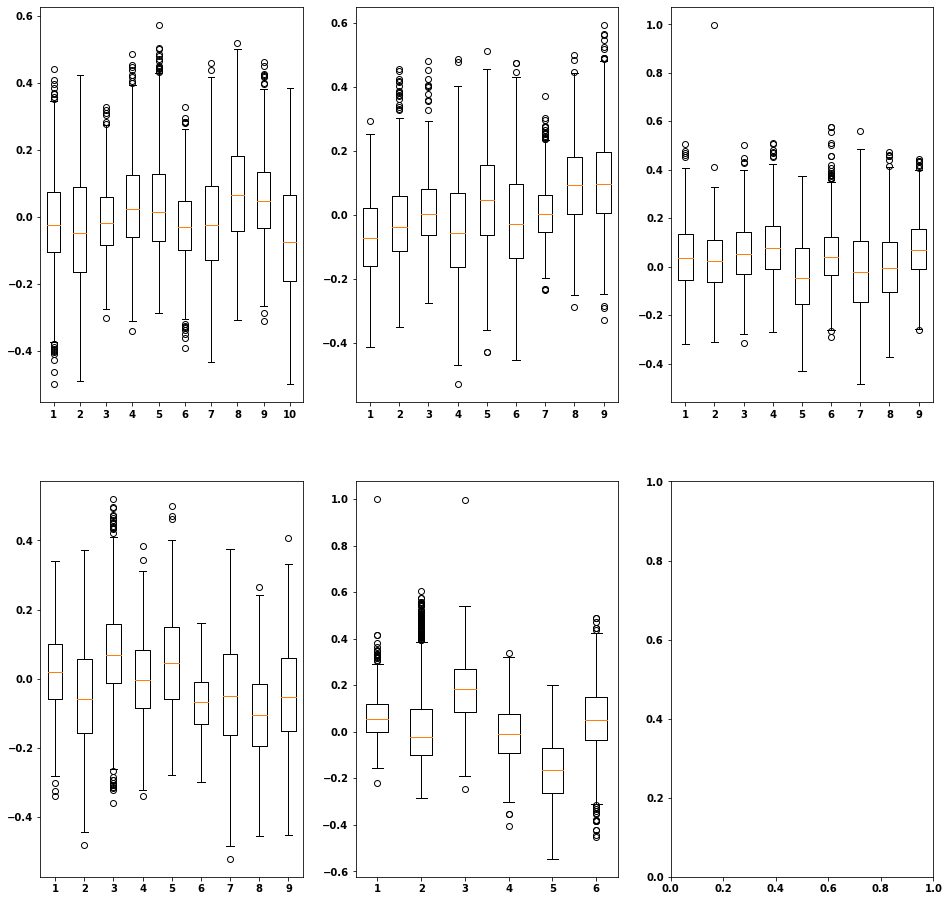

In [154]:
fig, (axs1, axs2) = plt.subplots(2,3, figsize = (16, 16))

axs1[0].boxplot(corr_result_c0.iloc[0:10,:])
axs1[1].boxplot(corr_result_c0.iloc[11:20,:])
axs1[2].boxplot(corr_result_c0.iloc[21:30,:])
axs2[0].boxplot(corr_result_c0.iloc[31:40,:])
axs2[1].boxplot(corr_result_c0.iloc[41:47,:])

### Preparing dataframe of cluster 1 for correlation

In [155]:
cluster_1_trans_factors = tomtom_dfs[1].sort_values('p-value')['Target_ID'][0:100]

In [156]:
print(len(cluster_1_trans_factors))
cluster_1_trans_factors = list(set(cluster_1_trans_factors))
print(len(cluster_1_trans_factors))

100
75


In [157]:
cluster_1_trans_factors = pd.Series(cluster_1_trans_factors).str.split('.', n=-1, expand=True)

In [158]:
cluster_1_trans_factors.columns = ['gene_name', 'postfix1', 'postfix2', 'postfix3']

In [159]:
cluster_1_trans_factors = cluster_1_trans_factors.set_index('gene_name')

In [160]:
cluster_1_trans_factors

,postfix1,postfix2,postfix3
gene_name,,,
ERR2_HUMAN,H11MO,0,A
AP2C_HUMAN,H11MO,0,A
MAZ_HUMAN,H11MO,0,A
SP4_HUMAN,H11MO,0,A
NFYC_HUMAN,H11MO,0,A
...,...,...,...
NFAC1_HUMAN,H11MO,0,B
KLF15_HUMAN,H11MO,0,A
ATF2_HUMAN,H11MO,0,B


In [161]:
cluster_1_trans_factors = pd.concat([cluster_1_trans_factors, genes_names], axis=1, join='inner')

In [162]:
cluster_1_trans_factors

,postfix1,postfix2,postfix3,Entry_name
ERR2_HUMAN,H11MO,0,A,ESRRB ERRB2 ESRL2 NR3B2
AP2C_HUMAN,H11MO,0,A,TFAP2C
MAZ_HUMAN,H11MO,0,A,MAZ ZNF801
SP4_HUMAN,H11MO,0,A,SP4
NFYC_HUMAN,H11MO,0,A,NFYC
...,...,...,...,...
NFAC1_HUMAN,H11MO,0,B,NFATC1 NFAT2 NFATC
KLF15_HUMAN,H11MO,0,A,KLF15 KKLF
ATF2_HUMAN,H11MO,0,B,ATF2 CREB2 CREBP1
E2F1_HUMAN,H11MO,0,A,E2F1 RBBP3


In [163]:
c1_li_dic = {}
entries = cluster_1_trans_factors['Entry_name']
no_ensmbl_1 = []

for i in range(len(entries)):
    gene = entries[i].split(' ')[0]
    server = "https://rest.ensembl.org"
    ext = "/xrefs/symbol/homo_sapiens/"+gene+"?"
 
    r = requests.get(server+ext, headers={ "Content-Type" : "application/json"})
 
    if not r.ok:
      r.raise_for_status()
      sys.exit()
 
    decoded = r.json()
    if len(decoded) > 0:
        c1_li_dic[str(gene)] = str(decoded[0].get('id'))
    else :
        no_ensmbl_1.append(entries[i])

In [164]:
cluster_1_ensembl = pd.DataFrame([c1_li_dic]).T

In [165]:
cluster_1_ensembl.columns=['Ensembl']

In [166]:
cluster_1_ensembl = cluster_1_ensembl.set_index('Ensembl')

In [167]:
ensembl_with_values_1 = pd.concat([cluster_1_ensembl,original], join='inner', axis=1)

In [168]:
ensembl_with_values_1 = ensembl_with_values_1.drop('records_doesnot_exceed_10', axis=1)

In [169]:
ensembl_with_values_1 = ensembl_with_values_1.rename(columns=cols_dic)

### Correlation of transcription factors values with cluster 1 values

In [170]:
genes_c1 = genes_c1.drop('cluster', axis=1)

In [171]:
ensembl_with_values_1 = np.log2(ensembl_with_values_1 + 1)

In [172]:
ensembl_with_values_1 = ensembl_with_values_1.sub(ensembl_with_values_1.mean(axis=1), axis=0)
ensembl_with_values_1 = ensembl_with_values_1.div(ensembl_with_values_1.std(axis=1), axis=0)

In [173]:
ensembl_with_values_1 = ensembl_with_values_1.loc[~ensembl_with_values_1.index.duplicated(),:]

In [174]:
corr_result_c1 = ensembl_with_values_1.apply(lambda row: genes_c1.corrwith(row, axis=1, method='spearman'), axis=1)

In [175]:
corr_result_c1

Transcript,ENSG00000198242,ENSG00000167700,ENSG00000130204,ENSG00000164182,ENSG00000179632,ENSG00000138495,ENSG00000176973,ENSG00000112511,ENSG00000142507,ENSG00000111641,...,ENSG00000159352,ENSG00000166925,ENSG00000080189,ENSG00000178096,ENSG00000143947,ENSG00000172590,ENSG00000205138,ENSG00000172336,ENSG00000178449,ENSG00000071889
ENSG00000119715,-0.182765,0.063600,0.163259,-0.098952,0.106313,-0.034833,-0.016164,0.111469,-0.055916,0.165501,...,-0.020649,0.147719,0.115325,-0.058522,0.030232,-0.068803,0.070609,0.047842,-0.006484,-0.009644
ENSG00000087510,-0.205274,-0.056350,-0.141687,-0.041338,-0.027586,0.120356,0.005063,0.003295,-0.203772,-0.083044,...,-0.151728,0.012382,-0.001492,-0.072414,-0.077143,-0.088778,-0.111128,-0.073001,0.052252,0.033440
ENSG00000103495,0.096945,0.306831,0.245715,-0.093112,0.219840,-0.308462,-0.204317,-0.098535,0.086607,0.074772,...,0.052153,0.064946,-0.097131,-0.043862,0.001516,-0.243880,0.080615,0.020118,0.060422,0.079727
ENSG00000105866,-0.148770,-0.263281,-0.190673,0.079236,-0.261512,-0.136891,-0.205594,0.079365,-0.380276,-0.012384,...,-0.263268,-0.060072,-0.126144,-0.141122,0.049078,-0.273291,-0.118966,-0.235637,-0.281049,-0.331963
ENSG00000066136,-0.028663,0.141881,0.198057,-0.162603,0.261096,-0.105455,0.012688,0.150417,0.055108,0.099103,...,0.201359,0.176521,0.111885,0.207378,-0.130626,-0.121027,0.011875,0.155908,-0.019983,0.152306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000131196,-0.040084,-0.002926,0.015319,-0.098458,0.129044,-0.051257,0.019585,0.182362,0.125839,-0.050847,...,0.003066,0.174507,0.012710,-0.017000,-0.097338,-0.068059,0.084140,-0.030734,0.073139,-0.002571
ENSG00000163884,-0.032414,-0.032093,-0.112329,-0.091824,-0.001631,-0.010238,-0.121105,0.292842,-0.175957,0.012196,...,0.077846,0.150642,0.169146,0.167102,0.032176,-0.044063,0.073696,-0.054487,-0.035254,0.094216
ENSG00000115966,-0.191444,-0.394015,-0.314952,0.018737,-0.375439,-0.117530,-0.265005,0.000887,-0.450537,-0.065775,...,-0.347741,-0.082650,-0.132704,-0.153059,-0.029212,-0.312161,-0.237904,-0.314397,-0.316362,-0.398717
ENSG00000101412,0.084205,0.259825,0.618046,0.246990,0.376691,0.248786,0.242445,0.242959,0.306812,0.408525,...,0.296973,0.033168,0.141373,0.012999,0.140497,0.229762,0.364993,0.473149,0.187222,0.157529


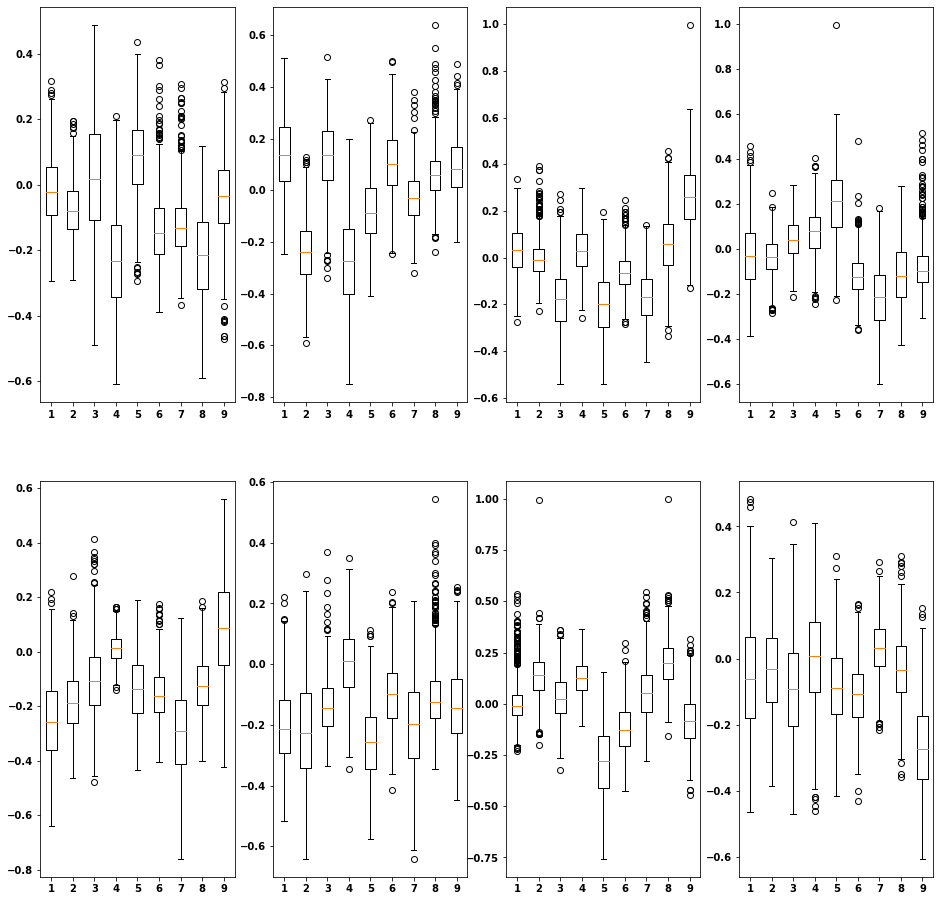

In [179]:
fig, axs = plt.subplots(2,4, figsize = (16, 16))
axs = axs.flatten()
ind = 0
for i in range(len(axs)):
    axs[i].boxplot(corr_result_c1.iloc[ind:ind+9,:])
    ind += 9


### Preparing dataframe of cluster 2 for correlation

In [181]:
cluster_2_trans_factors = tomtom_dfs[2].sort_values('p-value')['Target_ID'][0:100]

In [182]:
print(len(cluster_2_trans_factors))
cluster_2_trans_factors = list(set(cluster_2_trans_factors))
print(len(cluster_2_trans_factors))

100
63


In [183]:
cluster_2_trans_factors = pd.Series(cluster_2_trans_factors).str.split('.', n=-1, expand=True)

In [184]:
cluster_2_trans_factors.columns = ['gene_name', 'postfix1', 'postfix2', 'postfix3']

In [185]:
cluster_2_trans_factors = cluster_2_trans_factors.set_index('gene_name')

In [186]:
cluster_2_trans_factors

,postfix1,postfix2,postfix3
gene_name,,,
ERR2_HUMAN,H11MO,0,A
IRF8_HUMAN,H11MO,0,B
ERG_HUMAN,H11MO,0,A
ETV5_HUMAN,H11MO,0,C
ETS1_HUMAN,H11MO,0,A
...,...,...,...
NRF1_HUMAN,H11MO,0,A
NFAC1_HUMAN,H11MO,0,B
ATF2_HUMAN,H11MO,0,B


In [187]:
cluster_2_trans_factors = pd.concat([cluster_2_trans_factors, genes_names], axis=1, join='inner')

In [188]:
cluster_2_trans_factors

,postfix1,postfix2,postfix3,Entry_name
ERR2_HUMAN,H11MO,0,A,ESRRB ERRB2 ESRL2 NR3B2
IRF8_HUMAN,H11MO,0,B,IRF8 ICSBP1
ERG_HUMAN,H11MO,0,A,ERG
ETV5_HUMAN,H11MO,0,C,ETV5 ERM
ETS1_HUMAN,H11MO,0,A,ETS1 EWSR2
...,...,...,...,...
NRF1_HUMAN,H11MO,0,A,NRF1
NFAC1_HUMAN,H11MO,0,B,NFATC1 NFAT2 NFATC
ATF2_HUMAN,H11MO,0,B,ATF2 CREB2 CREBP1
E2F1_HUMAN,H11MO,0,A,E2F1 RBBP3


In [189]:
c2_li_dic = {}
entries = cluster_2_trans_factors['Entry_name']
no_ensmbl_2 = []

for i in range(len(entries)):
    gene = entries[i].split(' ')[0]
    server = "https://rest.ensembl.org"
    ext = "/xrefs/symbol/homo_sapiens/"+gene+"?"
 
    r = requests.get(server+ext, headers={ "Content-Type" : "application/json"})
 
    if not r.ok:
      r.raise_for_status()
      sys.exit()
 
    decoded = r.json()
    if len(decoded) > 0:
        c2_li_dic[str(gene)] = str(decoded[0].get('id'))
    else :
        no_ensmbl_2.append(entries[i])

In [190]:
cluster_2_ensembl = pd.DataFrame([c2_li_dic]).T

In [191]:
cluster_2_ensembl.columns=['Ensembl']

In [192]:
cluster_2_ensembl = cluster_2_ensembl.set_index('Ensembl')

In [193]:
ensembl_with_values_2 = pd.concat([cluster_2_ensembl,original], join='inner', axis=1)

In [194]:
ensembl_with_values_2 = ensembl_with_values_2.drop('records_doesnot_exceed_10', axis=1)

In [195]:
ensembl_with_values_2 = ensembl_with_values_2.rename(columns=cols_dic)

### Correlation of transcription factors values with cluster 2 values

In [196]:
genes_c2 = genes_c2.drop('cluster', axis=1)

In [197]:
ensembl_with_values_2 = np.log2(ensembl_with_values_2 + 1)

In [198]:
ensembl_with_values_2 = ensembl_with_values_2.sub(ensembl_with_values_2.mean(axis=1), axis=0)
ensembl_with_values_2 = ensembl_with_values_2.div(ensembl_with_values_2.std(axis=1), axis=0)

In [199]:
ensembl_with_values_2 = ensembl_with_values_2.loc[~ensembl_with_values_2.index.duplicated(),:]

In [200]:
corr_result_c2 = ensembl_with_values_2.apply(lambda row: genes_c2.corrwith(row, axis=1, method='spearman'), axis=1)

In [201]:
corr_result_c2

Transcript,ENSG00000146083,ENSG00000179262,ENSG00000064601,ENSG00000169992,ENSG00000159479,ENSG00000259956,ENSG00000108774,ENSG00000117394,ENSG00000105048,ENSG00000049239,...,ENSG00000124422,ENSG00000183010,ENSG00000188986,ENSG00000181191,ENSG00000092068,ENSG00000132004,ENSG00000171867,ENSG00000178209,ENSG00000103266,ENSG00000105063
ENSG00000119715,0.182373,0.153828,0.028294,0.094100,0.185051,0.049740,0.044638,0.143920,0.297327,0.019612,...,0.078773,-0.134372,0.054624,0.132502,0.082224,0.012912,0.183952,0.060344,-0.004017,0.116706
ENSG00000140968,0.002263,0.048527,0.194551,-0.147775,0.066755,-0.103582,0.226785,-0.088115,-0.011518,0.095067,...,-0.007354,-0.027953,0.043661,0.003288,-0.059260,0.000836,0.143921,0.026621,0.066617,0.239209
ENSG00000157554,-0.099193,-0.307811,-0.142925,-0.022580,-0.285483,-0.195415,-0.129374,-0.298165,-0.384110,0.050531,...,-0.062911,0.015355,-0.267037,-0.136650,0.089077,-0.119012,0.008085,-0.028284,-0.157432,-0.115506
ENSG00000244405,0.259169,0.018046,-0.014665,0.168710,-0.025195,0.203836,0.096226,0.157765,0.010795,0.218500,...,0.291819,0.042319,0.090851,0.232383,0.130340,-0.130674,0.170866,0.027716,-0.042611,-0.069535
ENSG00000134954,0.091277,0.048376,-0.052234,0.001651,-0.065838,0.000135,0.118352,0.128507,-0.084832,0.182536,...,0.166453,-0.066026,-0.148471,0.093963,-0.022352,-0.170721,0.222533,0.099847,-0.155000,0.162854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000131759,0.106038,-0.263489,-0.094336,-0.003306,-0.283135,-0.021663,0.012777,-0.046806,-0.320554,0.173013,...,-0.067967,-0.020581,0.021361,-0.014182,0.101530,0.199029,-0.192586,0.094540,-0.001683,0.054649
ENSG00000082641,0.232461,0.176495,0.083982,0.087557,0.029049,0.284942,0.456523,0.277767,-0.021598,0.269132,...,0.349777,0.231843,0.266120,0.372458,0.063079,0.270564,0.104672,0.003284,0.209002,0.345002
ENSG00000131196,0.009993,0.124918,0.120372,0.114301,0.031287,-0.041869,0.140286,-0.014789,0.125145,-0.001959,...,0.071118,0.001920,0.202130,0.078423,0.018443,0.049448,0.118848,0.139371,0.098810,0.182579
ENSG00000101412,0.109225,0.472973,0.150526,0.236800,0.507326,0.309301,0.262863,0.250529,0.466099,-0.123437,...,0.182255,0.167380,0.371774,0.291224,-0.058086,0.038679,0.135523,-0.023737,0.290642,0.171593


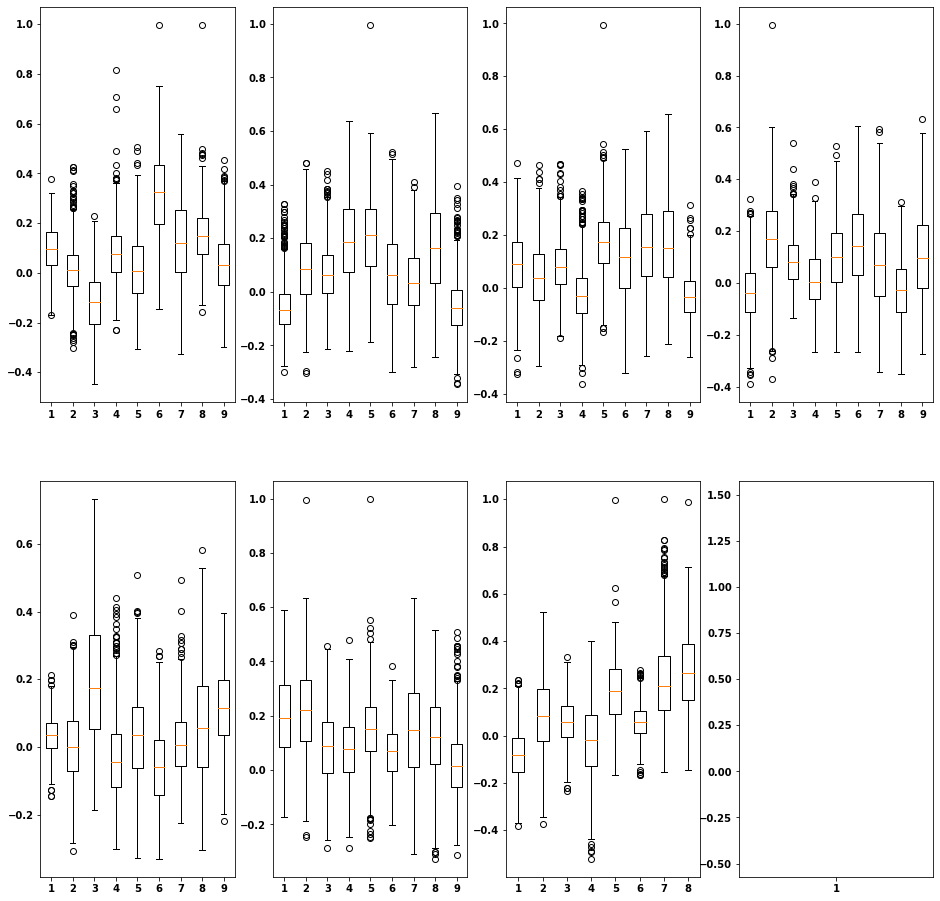

In [224]:
fig, axs = plt.subplots(2,4, figsize = (16, 16))
axs = axs.flatten()
ind = 0
for i in range(len(axs)):
    axs[i].boxplot(corr_result_c2.iloc[ind:ind+9,:])
    ind += 9

### Preparing dataframe of cluster 3 for correlation

In [203]:
cluster_3_trans_factors = tomtom_dfs[3].sort_values('p-value')['Target_ID'][0:100]

In [204]:
print(len(cluster_3_trans_factors))
cluster_3_trans_factors = list(set(cluster_3_trans_factors))
print(len(cluster_3_trans_factors))

100
62


In [205]:
cluster_3_trans_factors = pd.Series(cluster_3_trans_factors).str.split('.', n=-1, expand=True)

In [206]:
cluster_3_trans_factors.columns = ['gene_name', 'postfix1', 'postfix2', 'postfix3']

In [207]:
cluster_3_trans_factors = cluster_3_trans_factors.set_index('gene_name')

In [208]:
cluster_3_trans_factors

,postfix1,postfix2,postfix3
gene_name,,,
ETS1_HUMAN,H11MO,0,A
ETS2_HUMAN,H11MO,0,B
ETV5_HUMAN,H11MO,0,C
MAZ_HUMAN,H11MO,0,A
ERG_HUMAN,H11MO,0,A
...,...,...,...
ELK1_HUMAN,H11MO,0,B
NFAC1_HUMAN,H11MO,0,B
KLF15_HUMAN,H11MO,0,A


In [209]:
cluster_3_trans_factors = pd.concat([cluster_3_trans_factors, genes_names], axis=1, join='inner')

In [210]:
cluster_3_trans_factors

,postfix1,postfix2,postfix3,Entry_name
ETS1_HUMAN,H11MO,0,A,ETS1 EWSR2
ETS2_HUMAN,H11MO,0,B,ETS2
ETV5_HUMAN,H11MO,0,C,ETV5 ERM
MAZ_HUMAN,H11MO,0,A,MAZ ZNF801
ERG_HUMAN,H11MO,0,A,ERG
...,...,...,...,...
ELK1_HUMAN,H11MO,0,B,ELK1
NFAC1_HUMAN,H11MO,0,B,NFATC1 NFAT2 NFATC
KLF15_HUMAN,H11MO,0,A,KLF15 KKLF
ATF2_HUMAN,H11MO,0,B,ATF2 CREB2 CREBP1


In [211]:
c3_li_dic = {}
entries = cluster_3_trans_factors['Entry_name']
no_ensmbl_3 = []

for i in range(len(entries)):
    gene = entries[i].split(' ')[0]
    server = "https://rest.ensembl.org"
    ext = "/xrefs/symbol/homo_sapiens/"+gene+"?"
 
    r = requests.get(server+ext, headers={ "Content-Type" : "application/json"})
 
    if not r.ok:
      r.raise_for_status()
      sys.exit()
 
    decoded = r.json()
    if len(decoded) > 0:
        c3_li_dic[str(gene)] = str(decoded[0].get('id'))
    else :
        no_ensmbl_3.append(entries[i])

In [212]:
cluster_3_ensembl = pd.DataFrame([c3_li_dic]).T

In [213]:
cluster_3_ensembl.columns=['Ensembl']

In [214]:
cluster_3_ensembl = cluster_3_ensembl.set_index('Ensembl')

In [215]:
ensembl_with_values_3 = pd.concat([cluster_3_ensembl,original], join='inner', axis=1)

In [216]:
ensembl_with_values_3 = ensembl_with_values_3.drop('records_doesnot_exceed_10', axis=1)

In [217]:
ensembl_with_values_3 = ensembl_with_values_3.rename(columns=cols_dic)

### Correlation of transcription factors values with cluster 3 values

In [218]:
genes_c3 = genes_c3.drop('cluster', axis=1)

In [219]:
ensembl_with_values_3 = np.log2(ensembl_with_values_3 + 1)

In [220]:
ensembl_with_values_3 = ensembl_with_values_3.sub(ensembl_with_values_3.mean(axis=1), axis=0)
ensembl_with_values_3 = ensembl_with_values_3.div(ensembl_with_values_3.std(axis=1), axis=0)

In [221]:
ensembl_with_values_3 = ensembl_with_values_3.loc[~ensembl_with_values_3.index.duplicated(),:]

In [222]:
corr_result_c3 = ensembl_with_values_3.apply(lambda row: genes_c3.corrwith(row, axis=1, method='spearman'), axis=1)

In [223]:
corr_result_c3

Transcript,ENSG00000134108,ENSG00000070087,ENSG00000153561,ENSG00000166913,ENSG00000118363,ENSG00000121644,ENSG00000196704,ENSG00000143183,ENSG00000117139,ENSG00000168300,...,ENSG00000198730,ENSG00000115484,ENSG00000063046,ENSG00000143420,ENSG00000205339,ENSG00000111144,ENSG00000196586,ENSG00000110330,ENSG00000105968,ENSG00000066044
ENSG00000134954,0.386043,0.067825,0.237978,0.310180,0.113882,0.330157,0.049962,0.155020,0.220707,0.294353,...,0.322852,0.090954,0.183967,-0.072438,0.391407,0.044481,0.283668,0.472668,0.077607,0.149317
ENSG00000157557,0.041873,-0.105120,0.079781,-0.019747,0.115846,0.196446,-0.054175,-0.005443,0.222938,0.291364,...,0.152788,-0.143901,0.087862,-0.009908,0.152721,-0.060697,0.232031,0.171169,-0.063587,0.128083
ENSG00000244405,0.054709,0.034778,0.026455,0.190129,-0.030108,0.163202,0.045652,0.207765,0.169326,0.054826,...,0.189151,0.155676,0.151525,0.042771,0.186642,0.156948,-0.039267,0.190447,0.035870,0.126281
ENSG00000103495,-0.128868,0.225565,0.204404,0.121685,-0.156100,0.180898,0.012613,-0.092839,0.193257,-0.365737,...,0.183116,0.284898,0.214358,-0.085246,0.191998,0.092381,-0.021781,0.063598,0.247391,0.372968
ENSG00000157554,0.120017,0.008905,0.061987,-0.125865,0.076110,0.128141,-0.090983,-0.037534,0.171470,0.314772,...,0.091043,-0.270853,0.057827,-0.069430,0.050399,-0.164705,0.222296,0.062523,-0.152464,-0.046707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000126767,0.219082,0.319420,0.415751,0.393126,-0.066686,0.492713,0.186956,0.161721,0.408508,0.012078,...,0.371383,0.355180,0.186606,0.035075,0.337218,0.175431,0.171092,0.387269,0.319311,0.416974
ENSG00000131196,-0.093826,-0.044205,-0.045410,-0.002077,-0.053796,-0.067166,-0.021359,-0.090907,-0.105993,-0.108765,...,-0.056978,-0.013487,-0.119701,-0.049793,-0.156821,-0.076512,-0.117500,-0.017278,0.066964,-0.002915
ENSG00000163884,0.021139,0.074933,0.110946,-0.048465,0.013443,0.077312,0.040425,0.059217,0.126849,0.183085,...,0.065149,-0.031008,0.099620,0.077856,-0.046574,0.071192,-0.000638,-0.041256,-0.068201,-0.033953
ENSG00000115966,0.402168,0.290970,0.623704,0.396346,0.353259,0.585742,0.275455,0.308842,0.539643,0.519925,...,0.547471,0.264202,0.400820,0.067158,0.586045,0.217694,0.491696,0.612116,0.256475,0.326802


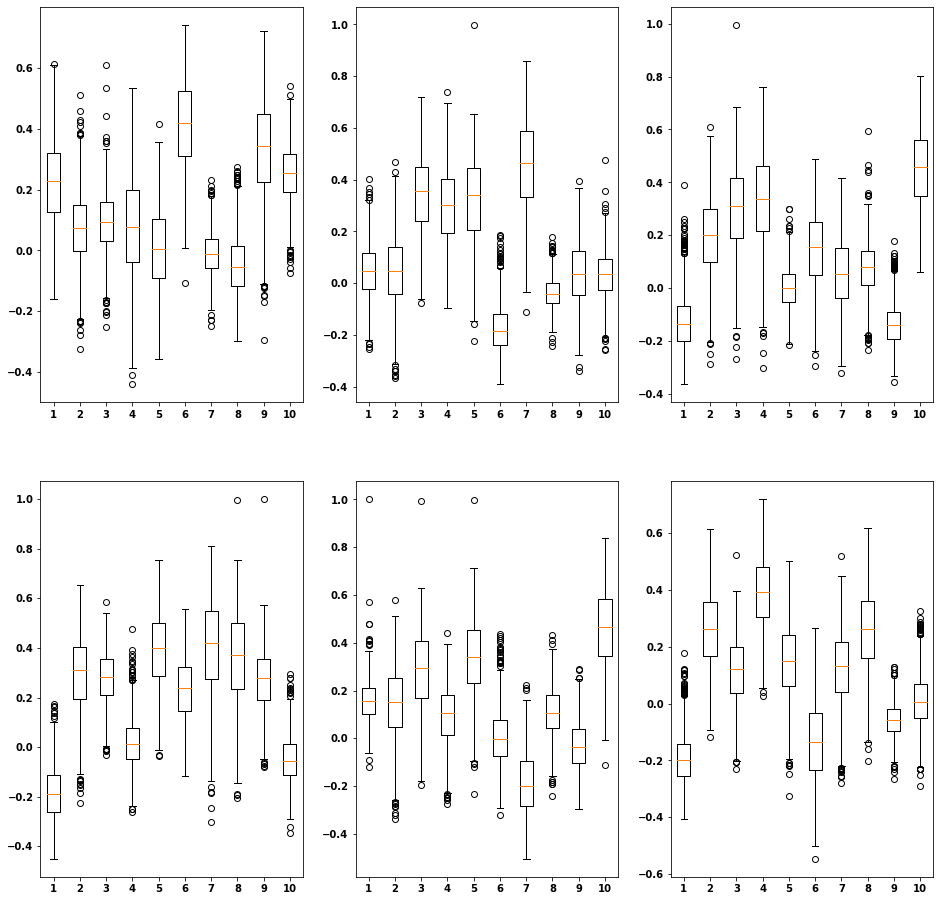

In [225]:
fig, axs = plt.subplots(2,3, figsize = (16, 16))
axs = axs.flatten()
ind = 0
for i in range(len(axs)):
    axs[i].boxplot(corr_result_c3.iloc[ind:ind+10,:])
    ind += 10